In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import preprocessing

Compares County and Net Income

In [47]:
# CNI is county net income, CAI is county average income

hospitalData = pd.read_excel(r"C:\Users\thewa\OneDrive\Documents\patientdatabutfinancial.xlsx")
cni = hospitalData[hospitalData["Key"] == 1][["COUNTY", "NET_INCOME"]]
print(cni["NET_INCOME"].mean())

dictt = {}
for val in range(len(cni.index)):
    if cni.iloc[val,0] in dictt:
        dictt[cni.iloc[val,0]][0] = int(dictt[cni.iloc[val,0]][0] + cni.iloc[val,1])
        dictt[cni.iloc[val,0]][1] += 1

    else:
        dictt[cni.iloc[val,0]] = [int(cni.iloc[val,1]), 1]

17487260.774984285


Computing Average Hospital Income by County

In [48]:
final = {}
for val in dictt:
    final[str(dictt[val][0] / dictt[val][1])] = str(val)

for i in sorted(final):
    print(final[i] + ": " + i)


San Benito: -1037268.75
Colusa: -1764010.2
Yuba: -2296202.0
Alameda: -2884848.3474576273
Glenn: -507805.375
Sutter: -72434.41666666667
San Francisco: 1003836.3717948718
San Joaquin: 10255940.096774194
Kern: 10761990.797979798
Mariposa: 1114682.25
Riverside: 11175706.835714286
Nevada: 11560928.9375
Yolo: 12180932.6875
San Luis Obispo: 12786173.725
Modoc: 1306967.1875
Merced: 13625011.666666666
Tehama: 13700775.727272727
Imperial: 1386882.9333333333
Fresno: 15119219.217948718
San Bernardino: 15371672.55978261
Shasta: 15447486.166666666
San Mateo: 17236986.60526316
Los Angeles: 18239733.904761903
Plumas: 1987634.375
Marin: 1991075.5416666667
Orange: 20500301.325
Stanislaus: 20686322.839285713
Tuolumne: 21793420.25
Santa Barbara: 21963196.54901961
Lake: 2307987.125
Contra Costa: 24889092.72
Calaveras: 249501.75
Santa Cruz: 25111179.2
Kings: 27266116.363636363
Sacramento: 30233198.36936937
Inyo: 315817.3125
Trinity: 3233429.0
Placer: 35899757.04347826
Madera: 36252926.625
Monterey: 38276225

In [49]:
cni.dropna()
headers = {'County Name': [],'Average Value': []}
cai = pd.DataFrame(data = headers)
counties = cni["COUNTY"].unique()
for val in counties:
    cai.loc[len(cai.index)] = [val, cni[cni["COUNTY"] == val]["NET_INCOME"].mean()]
pd.set_option("display.max_rows", None, "display.max_columns", None)
cai = cai.sort_values(by='Average Value', axis = 0, ascending = False)
cai
cai = cai.reset_index(drop=True)
cai


County Name  Average Value
0       Santa Clara   7.211389e+07
1         San Diego   4.070980e+07
2          Monterey   3.827623e+07
3            Madera   3.625293e+07
4            Placer   3.589976e+07
5        Sacramento   3.023320e+07
6             Kings   2.726612e+07
7        Santa Cruz   2.511118e+07
8      Contra Costa   2.488909e+07
9     Santa Barbara   2.196320e+07
10         Tuolumne   2.179342e+07
11       Stanislaus   2.068632e+07
12           Orange   2.050030e+07
13      Los Angeles   1.823973e+07
14        San Mateo   1.723699e+07
15           Shasta   1.544749e+07
16   San Bernardino   1.537167e+07
17           Fresno   1.511922e+07
18           Tehama   1.370078e+07
19           Merced   1.362501e+07
20  San Luis Obispo   1.278617e+07
21             Yolo   1.218093e+07
22           Nevada   1.156093e+07
23        Riverside   1.117571e+07
24             Kern   1.076199e+07
25      San Joaquin   1.025594e+07
26           Sonoma   9.844723e+06
27           Tulare   9.562653e+06
28          Ventura   9.446135e+06
29           Solano   8.161062e+06
30             Mono   8.120592e+06
31         Humboldt   8.075846e+06
32           Amador   7.361886e+06
33        Mendocino   6.495227e+06
34        El Dorado   6.361607e+06
35           Lassen   6.001896e+06
36        Del Norte   4.066373e+06
37            Butte   3.855885e+06
38         Siskiyou   3.843952e+06
39          Trinity   3.233429e+06
40             Lake   2.307987e+06
41            Marin   1.991076e+06
42           Plumas   1.987634e+06
43         Imperial   1.386883e+06
44            Modoc   1.306967e+06
45         Mariposa   1.114682e+06
46    San Francisco   1.003836e+06
47             Napa   4.093072e+05
48             Inyo   3.158173e+05
49        Calaveras   2.495018e+05
50           Sutter  -7.243442e+04
51            Glenn  -5.078054e+05
52       San Benito  -1.037269e+06
53           Colusa  -1.764010e+06
54             Yuba  -2.296202e+06
55          Alameda  -2.884848e+06

Pairplotting Data to look for Trends

In [50]:
hospitalData = pd.read_excel(r"C:\Users\thewa\Downloads\hadr-20.xlsx")
profits2020 = hospitalData[["FAC_NAME", "NET_INCOME"]]
hospitalData = pd.read_excel(r"C:\Users\thewa\Downloads\hadr-19 (1).xlsx")
profits2019 = hospitalData[["FAC_NAME", "NET_INCOME"]]
hospitalData = pd.read_excel(r"C:\Users\thewa\Downloads\hadr-18.xlsx")
profits2018 = hospitalData[["FAC_NAME", "NET_INCOME"]]
hospitalData = pd.read_excel(r"C:\Users\thewa\Downloads\hadr-17.xlsx")
profits2017 = hospitalData[["FAC_NAME", "NET_INCOME"]]
hospitalData = pd.read_excel(r"C:\Users\thewa\Downloads\hadf16-_092018.xlsx")
profits2016 = hospitalData[["FAC_NAME", "NET_INCOME"]]
hospitalData = pd.read_excel(r"C:\Users\thewa\Downloads\hafd15-32018-extract.xlsx")
profits2015 = hospitalData[["FAC_NAME", "NET_INCOME"]]
hospitalData = pd.read_excel(r"C:\Users\thewa\Downloads\hafd14-42017-extract.xlsx")
profits2014 = hospitalData[["FAC_NAME", "NET_INCOME"]]
hospitalData = pd.read_excel(r"C:\Users\thewa\Downloads\hafd13-92015-extract.xls")
profits2013 = hospitalData[["FAC_NAME", "NET_INCOME"]]
hospitalData = pd.read_excel(r"C:\Users\thewa\Downloads\hafd12-10-2014-extract.xls")
profits2012 = hospitalData[["FAC_NAME", "NET_INCOME"]]

profits2020

FAC_NAME  NET_INCOME
0                         ADVENTIST HEALTH AND RIDEOUT   -37451634
1                         ADVENTIST HEALTH BAKERSFIELD    16713246
2                           ADVENTIST HEALTH CLEARLAKE     -872593
3                              ADVENTIST HEALTH DELANO     1037686
4                            ADVENTIST HEALTH GLENDALE     8797056
5                             ADVENTIST HEALTH HANFORD    25857958
6                     ADVENTIST HEALTH HOWARD MEMORIAL     6674136
7                       ADVENTIST HEALTH LODI MEMORIAL     2582524
8                     ADVENTIST HEALTH MENDOCINO COAST      342699
9                             ADVENTIST HEALTH REEDLEY    28157860
10                        ADVENTIST HEALTH SIMI VALLEY    -1477603
11                  ADVENTIST HEALTH SONORA - GREENLEY    22723168
12                         ADVENTIST HEALTH ST. HELENA   -19101261
13                   ADVENTIST HEALTH TEHACHAPI VALLEY     5020366
14                             ADVENTIST HEALTH TULARE    -1643493
15                       ADVENTIST HEALTH UKIAH VALLEY    11703218
16                            ADVENTIST HEALTH VALLEJO    -2146599
17                     ADVENTIST HEALTH WHITE MEMORIAL   -12988202
18                AHMC ANAHEIM REGIONAL MEDICAL CENTER      561774
19                                    ALAMEDA HOSPITAL   111363341
20                    ALHAMBRA HOSPITAL MEDICAL CENTER     7339749
21   ALTA BATES SUMMIT MEDICAL CENTER - ALTA BATES ...     5883639
22   ALTA BATES SUMMIT MEDICAL CENTER - SUMMIT HAWT...     4404794
23                                   ALVARADO HOSPITAL   -14373442
24                      ALVARADO PARKWAY INSTITUTE BHS     2465195
25                            AMERICAN RECOVERY CENTER     -240013
26                       ANAHEIM GLOBAL MEDICAL CENTER    -8026640
27                            ANTELOPE VALLEY HOSPITAL    10698420
28                   ARROWHEAD REGIONAL MEDICAL CENTER    21366257
29                           ATASCADERO STATE HOSPITAL    38923008
30           AURORA BEHAVIORAL HEALTHCARE - SANTA ROSA      228689
31                                  AURORA CHARTER OAK     3335501
32                         AURORA LAS ENCINAS HOSPITAL     1430830
33                                    AURORA SAN DIEGO     7866916
34                       AURORA VISTA DEL MAR HOSPITAL     1153525
35          BAKERSFIELD BEHAVIORAL HEALTHCARE HOSPITAL    -3491333
36                          BAKERSFIELD HEART HOSPITAL    -1000345
37                       BAKERSFIELD MEMORIAL HOSPITAL    66115108
38                     BALLARD REHABILITATION HOSPITAL     5650893
39                        BANNER LASSEN MEDICAL CENTER     2859061
40                         BARLOW RESPIRATORY HOSPITAL    -3399243
41                          BARSTOW COMMUNITY HOSPITAL    11593737
42                            BARTON MEMORIAL HOSPITAL    12120858
43                      BEAR VALLEY COMMUNITY HOSPITAL     6950542
44                                    BEVERLY HOSPITAL    -3357091
45                               BHC ALHAMBRA HOSPITAL    14648612
46                    BUTTE COUNTY MENTAL HEALTH - PHF    -3443521
47                  CALIFORNIA HOSPITAL MEDICAL CENTER   287960525
48   CALIFORNIA PACIFIC MEDICAL CENTER - MISSION BE...  -141158520
49   CALIFORNIA PACIFIC MEDICAL CENTER - VAN NESS C...   -81149039
50                 CALIFORNIA REHABILITATION INSTITUTE    24847915
51                               CANYON RIDGE HOSPITAL    15160494
52     CASA COLINA HOSPITAL AND CENTER FOR HEALTH CARE    -1876958
53                       CASA PALMERA CARE CENTER, LLC     3602527
54                      CATALINA ISLAND MEDICAL CENTER     1298325
55                CEDARS-SINAI MARINA DEL REY HOSPITAL      381846
56                         CEDARS-SINAI MEDICAL CENTER   455456942
57                   CENTINELA HOSPITAL MEDICAL CENTER    20959628
58            CENTRAL STAR PSYCHIATRIC HEALTH FACILITY      498364
59                   CENTR

In [51]:
profits2019

FAC_NAME  NET_INCOME
0                         ADVENTIST HEALTH AND RIDEOUT   -25638543
1                         ADVENTIST HEALTH AND RIDEOUT   -23078067
2                         ADVENTIST HEALTH BAKERSFIELD    26985239
3                           ADVENTIST HEALTH CLEARLAKE     5956730
4                       ADVENTIST HEALTH FEATHER RIVER    -1561417
5                            ADVENTIST HEALTH GLENDALE   -20440457
6                             ADVENTIST HEALTH HANFORD    51163259
7                     ADVENTIST HEALTH HOWARD MEMORIAL     3747979
8                       ADVENTIST HEALTH LODI MEMORIAL    -2606861
9                             ADVENTIST HEALTH REEDLEY    27421949
10                        ADVENTIST HEALTH SIMI VALLEY     2949956
11                  ADVENTIST HEALTH SONORA - GREENLEY    21322016
12                         ADVENTIST HEALTH ST. HELENA   -24443153
13                   ADVENTIST HEALTH TEHACHAPI VALLEY    -3000723
14                             ADVENTIST HEALTH TULARE    -8040298
15                       ADVENTIST HEALTH UKIAH VALLEY     5637686
16                            ADVENTIST HEALTH VALLEJO    -2765553
17                     ADVENTIST HEALTH WHITE MEMORIAL     7690691
18                AHMC ANAHEIM REGIONAL MEDICAL CENTER    -6366757
19                                    ALAMEDA HOSPITAL   -26766732
20                    ALHAMBRA HOSPITAL MEDICAL CENTER    10995859
21   ALTA BATES SUMMIT MEDICAL CENTER - ALTA BATES ...    20591132
22   ALTA BATES SUMMIT MEDICAL CENTER - SUMMIT HAWT...     5474645
23                                   ALVARADO HOSPITAL   -18944036
24                      ALVARADO PARKWAY INSTITUTE BHS     1402544
25                            AMERICAN RECOVERY CENTER      507431
26                       ANAHEIM GLOBAL MEDICAL CENTER    -4276306
27                            ANTELOPE VALLEY HOSPITAL    19845906
28                   ARROWHEAD REGIONAL MEDICAL CENTER    61172111
29                           ATASCADERO STATE HOSPITAL    41086398
30           AURORA BEHAVIORAL HEALTHCARE - SANTA ROSA      356327
31                                  AURORA CHARTER OAK     1607159
32                         AURORA LAS ENCINAS HOSPITAL    -1551811
33                                    AURORA SAN DIEGO     6532155
34                       AURORA VISTA DEL MAR HOSPITAL     5220680
35          BAKERSFIELD BEHAVIORAL HEALTHCARE HOSPITAL    -4314464
36                          BAKERSFIELD HEART HOSPITAL     4549981
37                       BAKERSFIELD MEMORIAL HOSPITAL    38847647
38                     BALLARD REHABILITATION HOSPITAL     3068577
39                        BANNER LASSEN MEDICAL CENTER     2926723
40                         BARLOW RESPIRATORY HOSPITAL     4948965
41                          BARSTOW COMMUNITY HOSPITAL    13491862
42                            BARTON MEMORIAL HOSPITAL    11718221
43                      BEAR VALLEY COMMUNITY HOSPITAL     7310120
44                                    BEVERLY HOSPITAL    -2915653
45                               BHC ALHAMBRA HOSPITAL    15897150
46                    BUTTE COUNTY MENTAL HEALTH - PHF    -3828447
47                  CALIFORNIA HOSPITAL MEDICAL CENTER    66306260
48                   CALIFORNIA PACIFIC MEDICAL CENTER    36527731
49   CALIFORNIA PACIFIC MEDICAL CENTER - MISSION BE...   -81107430
50   CALIFORNIA PACIFIC MEDICAL CENTER - VAN NESS C...    68065735
51                 CALIFORNIA REHABILITATION INSTITUTE    20297038
52                               CANYON RIDGE HOSPITAL    14930478
53     CASA COLINA HOSPITAL AND CENTER FOR HEALTH CARE    -7900902
54                      CATALINA ISLAND MEDICAL CENTER      311182
55                CEDARS-SINAI MARINA DEL REY HOSPITAL     7455585
56                         CEDARS-SINAI MEDICAL CENTER   554866990
57                   CENTINELA HOSPITAL MEDICAL CENTER    12799450
58            CENTRAL STAR PSYCHIATRIC HEALTH FACILITY      128232
59                   CENTR

In [52]:
profits2018

FAC_NAME  NET_INCOME
0                         ADVENTIST HEALTH BAKERSFIELD    17726744
1                           ADVENTIST HEALTH CLEARLAKE    12036607
2                       ADVENTIST HEALTH FEATHER RIVER     2424966
3                            ADVENTIST HEALTH GLENDALE    26257945
4                             ADVENTIST HEALTH HANFORD    32533688
5                     ADVENTIST HEALTH HOWARD MEMORIAL      836052
6                       ADVENTIST HEALTH LODI MEMORIAL     5547344
7                             ADVENTIST HEALTH REEDLEY    20939817
8                         ADVENTIST HEALTH SIMI VALLEY     1910394
9                   ADVENTIST HEALTH SONORA - GREENLEY    21901871
10                         ADVENTIST HEALTH ST. HELENA   -11277036
11                   ADVENTIST HEALTH TEHACHAPI VALLEY    -5115554
12                   ADVENTIST HEALTH TEHACHAPI VALLEY     -749789
13                       ADVENTIST HEALTH UKIAH VALLEY    19682951
14                            ADVENTIST HEALTH VALLEJO      565822
15                     ADVENTIST HEALTH WHITE MEMORIAL    79291451
16                AHMC ANAHEIM REGIONAL MEDICAL CENTER    22393307
17                                    ALAMEDA HOSPITAL   -26401437
18                    ALHAMBRA HOSPITAL MEDICAL CENTER     8341515
19   ALTA BATES SUMMIT MEDICAL CENTER - ALTA BATES ...   -12544865
20   ALTA BATES SUMMIT MEDICAL CENTER - SUMMIT HAWT...    20517461
21                                   ALVARADO HOSPITAL   -11155852
22                      ALVARADO PARKWAY INSTITUTE BHS     1754890
23                            AMERICAN RECOVERY CENTER      665948
24                       ANAHEIM GLOBAL MEDICAL CENTER    -5397062
25                            ANTELOPE VALLEY HOSPITAL    25750669
26                   ARROWHEAD REGIONAL MEDICAL CENTER    43994365
27                           ATASCADERO STATE HOSPITAL    30905544
28           AURORA BEHAVIORAL HEALTHCARE - SANTA ROSA      282218
29                                  AURORA CHARTER OAK     3698365
30                         AURORA LAS ENCINAS HOSPITAL     1392967
31                                    AURORA SAN DIEGO     3058111
32                       AURORA VISTA DEL MAR HOSPITAL    -1919078
33          BAKERSFIELD BEHAVIORAL HEALTHCARE HOSPITAL    -4281791
34                          BAKERSFIELD HEART HOSPITAL    12705248
35                       BAKERSFIELD MEMORIAL HOSPITAL    58943388
36                     BALLARD REHABILITATION HOSPITAL    -6818453
37                        BANNER LASSEN MEDICAL CENTER     4185006
38                         BARLOW RESPIRATORY HOSPITAL    -1285041
39                          BARSTOW COMMUNITY HOSPITAL    13625025
40                            BARTON MEMORIAL HOSPITAL    17911033
41                      BEAR VALLEY COMMUNITY HOSPITAL     4207973
42                                    BEVERLY HOSPITAL     3811989
43                               BHC ALHAMBRA HOSPITAL    15474165
44                    BUTTE COUNTY MENTAL HEALTH - PHF    -3444647
45                  CALIFORNIA HOSPITAL MEDICAL CENTER   101355641
46                   CALIFORNIA PACIFIC MEDICAL CENTER   142039779
47   CALIFORNIA PACIFIC MEDICAL CENTER - MISSION BE...   -55993456
48    CALIFORNIA PACIFIC MEDICAL CTR - ST LUKES CAMPUS   -74271827
49                 CALIFORNIA REHABILITATION INSTITUTE    11308329
50                               CANYON RIDGE HOSPITAL    13499251
51     CASA COLINA HOSPITAL AND CENTER FOR HEALTH CARE    -5355760
52                      CATALINA ISLAND MEDICAL CENTER      584458
53                         CEDARS-SINAI MEDICAL CENTER   303549197
54                   CENTINELA HOSPITAL MEDICAL CENTER    30723978
55            CENTRAL STAR PSYCHIATRIC HEALTH FACILITY      328550
56                   CENTRAL VALLEY SPECIALTY HOSPITAL     8385769
57                       CHAPMAN GLOBAL MEDICAL CENTER    -5190620
58   CHILDREN'S HEALTHCARE ORGANIZATION OF NORTHERN...     1462165
59   CHILDREN'S HOSPITAL A

In [53]:
profits2017

FAC_NAME  NET_INCOME
0                         ADVENTIST HEALTH BAKERSFIELD    28348242
1                           ADVENTIST HEALTH CLEARLAKE    13489055
2                       ADVENTIST HEALTH FEATHER RIVER    12238054
3                            ADVENTIST HEALTH GLENDALE    -8482705
4                             ADVENTIST HEALTH HANFORD    60355353
5                     ADVENTIST HEALTH HOWARD MEMORIAL     3639132
6                       ADVENTIST HEALTH LODI MEMORIAL     2132068
7                             ADVENTIST HEALTH REEDLEY    43723447
8                         ADVENTIST HEALTH SIMI VALLEY    -5920618
9                   ADVENTIST HEALTH SONORA - GREENLEY    21231026
10                         ADVENTIST HEALTH ST. HELENA    -1273135
11                   ADVENTIST HEALTH TEHACHAPI VALLEY    -1035206
12                       ADVENTIST HEALTH UKIAH VALLEY    22387054
13                            ADVENTIST HEALTH VALLEJO      222881
14                     ADVENTIST HEALTH WHITE MEMORIAL    84575759
15                AHMC ANAHEIM REGIONAL MEDICAL CENTER    14572284
16                                    ALAMEDA HOSPITAL   -19705685
17                    ALHAMBRA HOSPITAL MEDICAL CENTER    11609244
18   ALTA BATES SUMMIT MEDICAL CENTER - ALTA BATES ...   -10756232
19   ALTA BATES SUMMIT MEDICAL CENTER - SUMMIT HAWT...  -128779194
20                                   ALVARADO HOSPITAL   -14711544
21                      ALVARADO PARKWAY INSTITUTE BHS     1537539
22                            AMERICAN RECOVERY CENTER      271394
23                       ANAHEIM GLOBAL MEDICAL CENTER    -5652965
24                            ANTELOPE VALLEY HOSPITAL    31002412
25                   ARROWHEAD REGIONAL MEDICAL CENTER    68747295
26                           ATASCADERO STATE HOSPITAL    26447057
27           AURORA BEHAVIORAL HEALTHCARE - SANTA ROSA      271472
28                                  AURORA CHARTER OAK     5317305
29                         AURORA LAS ENCINAS HOSPITAL     3811209
30                                    AURORA SAN DIEGO     4407887
31                       AURORA VISTA DEL MAR HOSPITAL     2202738
32          BAKERSFIELD BEHAVIORAL HEALTHCARE HOSPITAL     -941439
33                          BAKERSFIELD HEART HOSPITAL     2705240
34                       BAKERSFIELD MEMORIAL HOSPITAL    30828018
35                     BALLARD REHABILITATION HOSPITAL     6012951
36                        BANNER LASSEN MEDICAL CENTER     6973855
37                         BARLOW RESPIRATORY HOSPITAL    -2859534
38                          BARSTOW COMMUNITY HOSPITAL    15515437
39                            BARTON MEMORIAL HOSPITAL     5257919
40                      BEAR VALLEY COMMUNITY HOSPITAL     4412862
41                                    BEVERLY HOSPITAL    10592084
42                               BHC ALHAMBRA HOSPITAL    14625107
43                    BUTTE COUNTY MENTAL HEALTH - PHF    -2074227
44                  CALIFORNIA HOSPITAL MEDICAL CENTER    27260677
45                   CALIFORNIA PACIFIC MEDICAL CENTER   188000832
46    CALIFORNIA PACIFIC MEDICAL CTR - ST LUKES CAMPUS   -68850590
47                 CALIFORNIA REHABILITATION INSTITUTE     2469859
48                               CANYON RIDGE HOSPITAL    12686855
49     CASA COLINA HOSPITAL AND CENTER FOR HEALTH CARE   -10533063
50                      CATALINA ISLAND MEDICAL CENTER    -1231388
51                         CEDARS-SINAI MEDICAL CENTER   275736136
52                   CENTINELA HOSPITAL MEDICAL CENTER    42557561
53            CENTRAL STAR PSYCHIATRIC HEALTH FACILITY       48506
54                   CENTRAL VALLEY SPECIALTY HOSPITAL    12163553
55                       CHAPMAN GLOBAL MEDICAL CENTER    -6642924
56   CHILDREN'S HOSPITAL AND RESEARCH CENTER AT OAK...    18205115
57                      CHILDREN'S HOSPITAL AT MISSION    13385024
58                     CHILDREN'S HOSPITAL LOS ANGELES   -12672771
59                CHILDREN

In [54]:
profits2016

FAC_NAME  NET_INCOME
0     ADVENTIST HEALTH MEDICAL CENTER TEHACHAPI VALLEY     -328210
1                   ADVENTIST MEDICAL CENTER - HANFORD    52046036
2                   ADVENTIST MEDICAL CENTER - REEDLEY    24383740
3                 AHMC ANAHEIM REGIONAL MEDICAL CENTER     -267107
4                                     ALAMEDA HOSPITAL   -11613407
5                     ALHAMBRA HOSPITAL MEDICAL CENTER    11029847
6    ALTA BATES SUMMIT MEDICAL CENTER - ALTA BATES ...    20589457
7    ALTA BATES SUMMIT MEDICAL CENTER - SUMMIT HAWT...    19675594
8                                    ALVARADO HOSPITAL   -18548538
9                       ALVARADO PARKWAY INSTITUTE BHS     2759059
10                            AMERICAN RECOVERY CENTER      -19236
11                       ANAHEIM GLOBAL MEDICAL CENTER    -2156816
12                            ANTELOPE VALLEY HOSPITAL     2433406
13                   ARROWHEAD REGIONAL MEDICAL CENTER   131484661
14                           ATASCADERO STATE HOSPITAL    25324793
15           AURORA BEHAVIORAL HEALTHCARE - SANTA ROSA      192159
16                                  AURORA CHARTER OAK     8352433
17                         AURORA LAS ENCINAS HOSPITAL     3746917
18                                    AURORA SAN DIEGO     5257238
19                       AURORA VISTA DEL MAR HOSPITAL     2934452
20          BAKERSFIELD BEHAVIORAL HEALTHCARE HOSPITAL    -4619290
21                          BAKERSFIELD HEART HOSPITAL     -179430
22                       BAKERSFIELD MEMORIAL HOSPITAL    19411331
23                     BALLARD REHABILITATION HOSPITAL     4424397
24                        BANNER LASSEN MEDICAL CENTER     8863285
25                         BARLOW RESPIRATORY HOSPITAL     3197633
26                          BARSTOW COMMUNITY HOSPITAL    19221855
27                            BARTON MEMORIAL HOSPITAL    19024202
28                      BEAR VALLEY COMMUNITY HOSPITAL     2987397
29                                    BEVERLY HOSPITAL     9487006
30                               BHC ALHAMBRA HOSPITAL    14318928
31                    BUTTE COUNTY MENTAL HEALTH - PHF    -2345518
32                  CALIFORNIA HOSPITAL MEDICAL CENTER    37175170
33                   CALIFORNIA PACIFIC MEDICAL CENTER   118747419
34    CALIFORNIA PACIFIC MEDICAL CTR - ST LUKES CAMPUS   -42725617
35                 CALIFORNIA REHABILITATION INSTITUTE   -11384044
36                               CANYON RIDGE HOSPITAL    11743582
37     CASA COLINA HOSPITAL AND CENTER FOR HEALTH CARE     2426910
38                      CATALINA ISLAND MEDICAL CENTER     -630766
39                         CEDARS-SINAI MEDICAL CENTER   340830170
40                   CENTINELA HOSPITAL MEDICAL CENTER    19358440
41            CENTRAL STAR PSYCHIATRIC HEALTH FACILITY      -82816
42                   CENTRAL VALLEY SPECIALTY HOSPITAL     9886366
43                       CHAPMAN GLOBAL MEDICAL CENTER    -3319439
44   CHILDREN'S HOSPITAL AND RESEARCH CENTER AT OAK...   -61655519
45                      CHILDREN'S HOSPITAL AT MISSION     8511137
46                  CHILDREN'S HOSPITAL OF LOS ANGELES   -58797408
47                CHILDREN'S HOSPITAL OF ORANGE COUNTY    10518976
48    CHILDRENS RECOVERY CENTER OF NORTHERN CALIFORNIA       78435
49                                    CHINESE HOSPITAL    -6185671
50                         CHINO VALLEY MEDICAL CENTER     5199313
51            CITRUS VALLEY MEDICAL CENTER - QV CAMPUS    43006905
52     CITY OF HOPE HELFORD CLINICAL RESEARCH HOSPITAL   103790570
53                     CLOVIS COMMUNITY MEDICAL CENTER    25205469
54                    COALINGA REGIONAL MEDICAL CENTER      231430
55                             COALINGA STATE HOSPITAL           0
56                                COAST PLAZA HOSPITAL    -4567570
57                                    COLLEGE HOSPITAL     4904440
58                         COLLEGE HOSPITAL COSTA MESA    34956678
59                        

Getting Correlation Coeffs

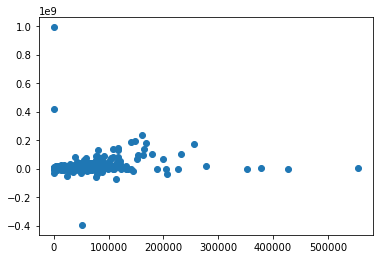

In [55]:
StaffedIncome = hospitalData[["DAY_TOT", "NET_INCOME"]]
StaffedIncome
plt.scatter(StaffedIncome[["DAY_TOT"]], StaffedIncome[["NET_INCOME"]])
plt.show()

Working with patients over years

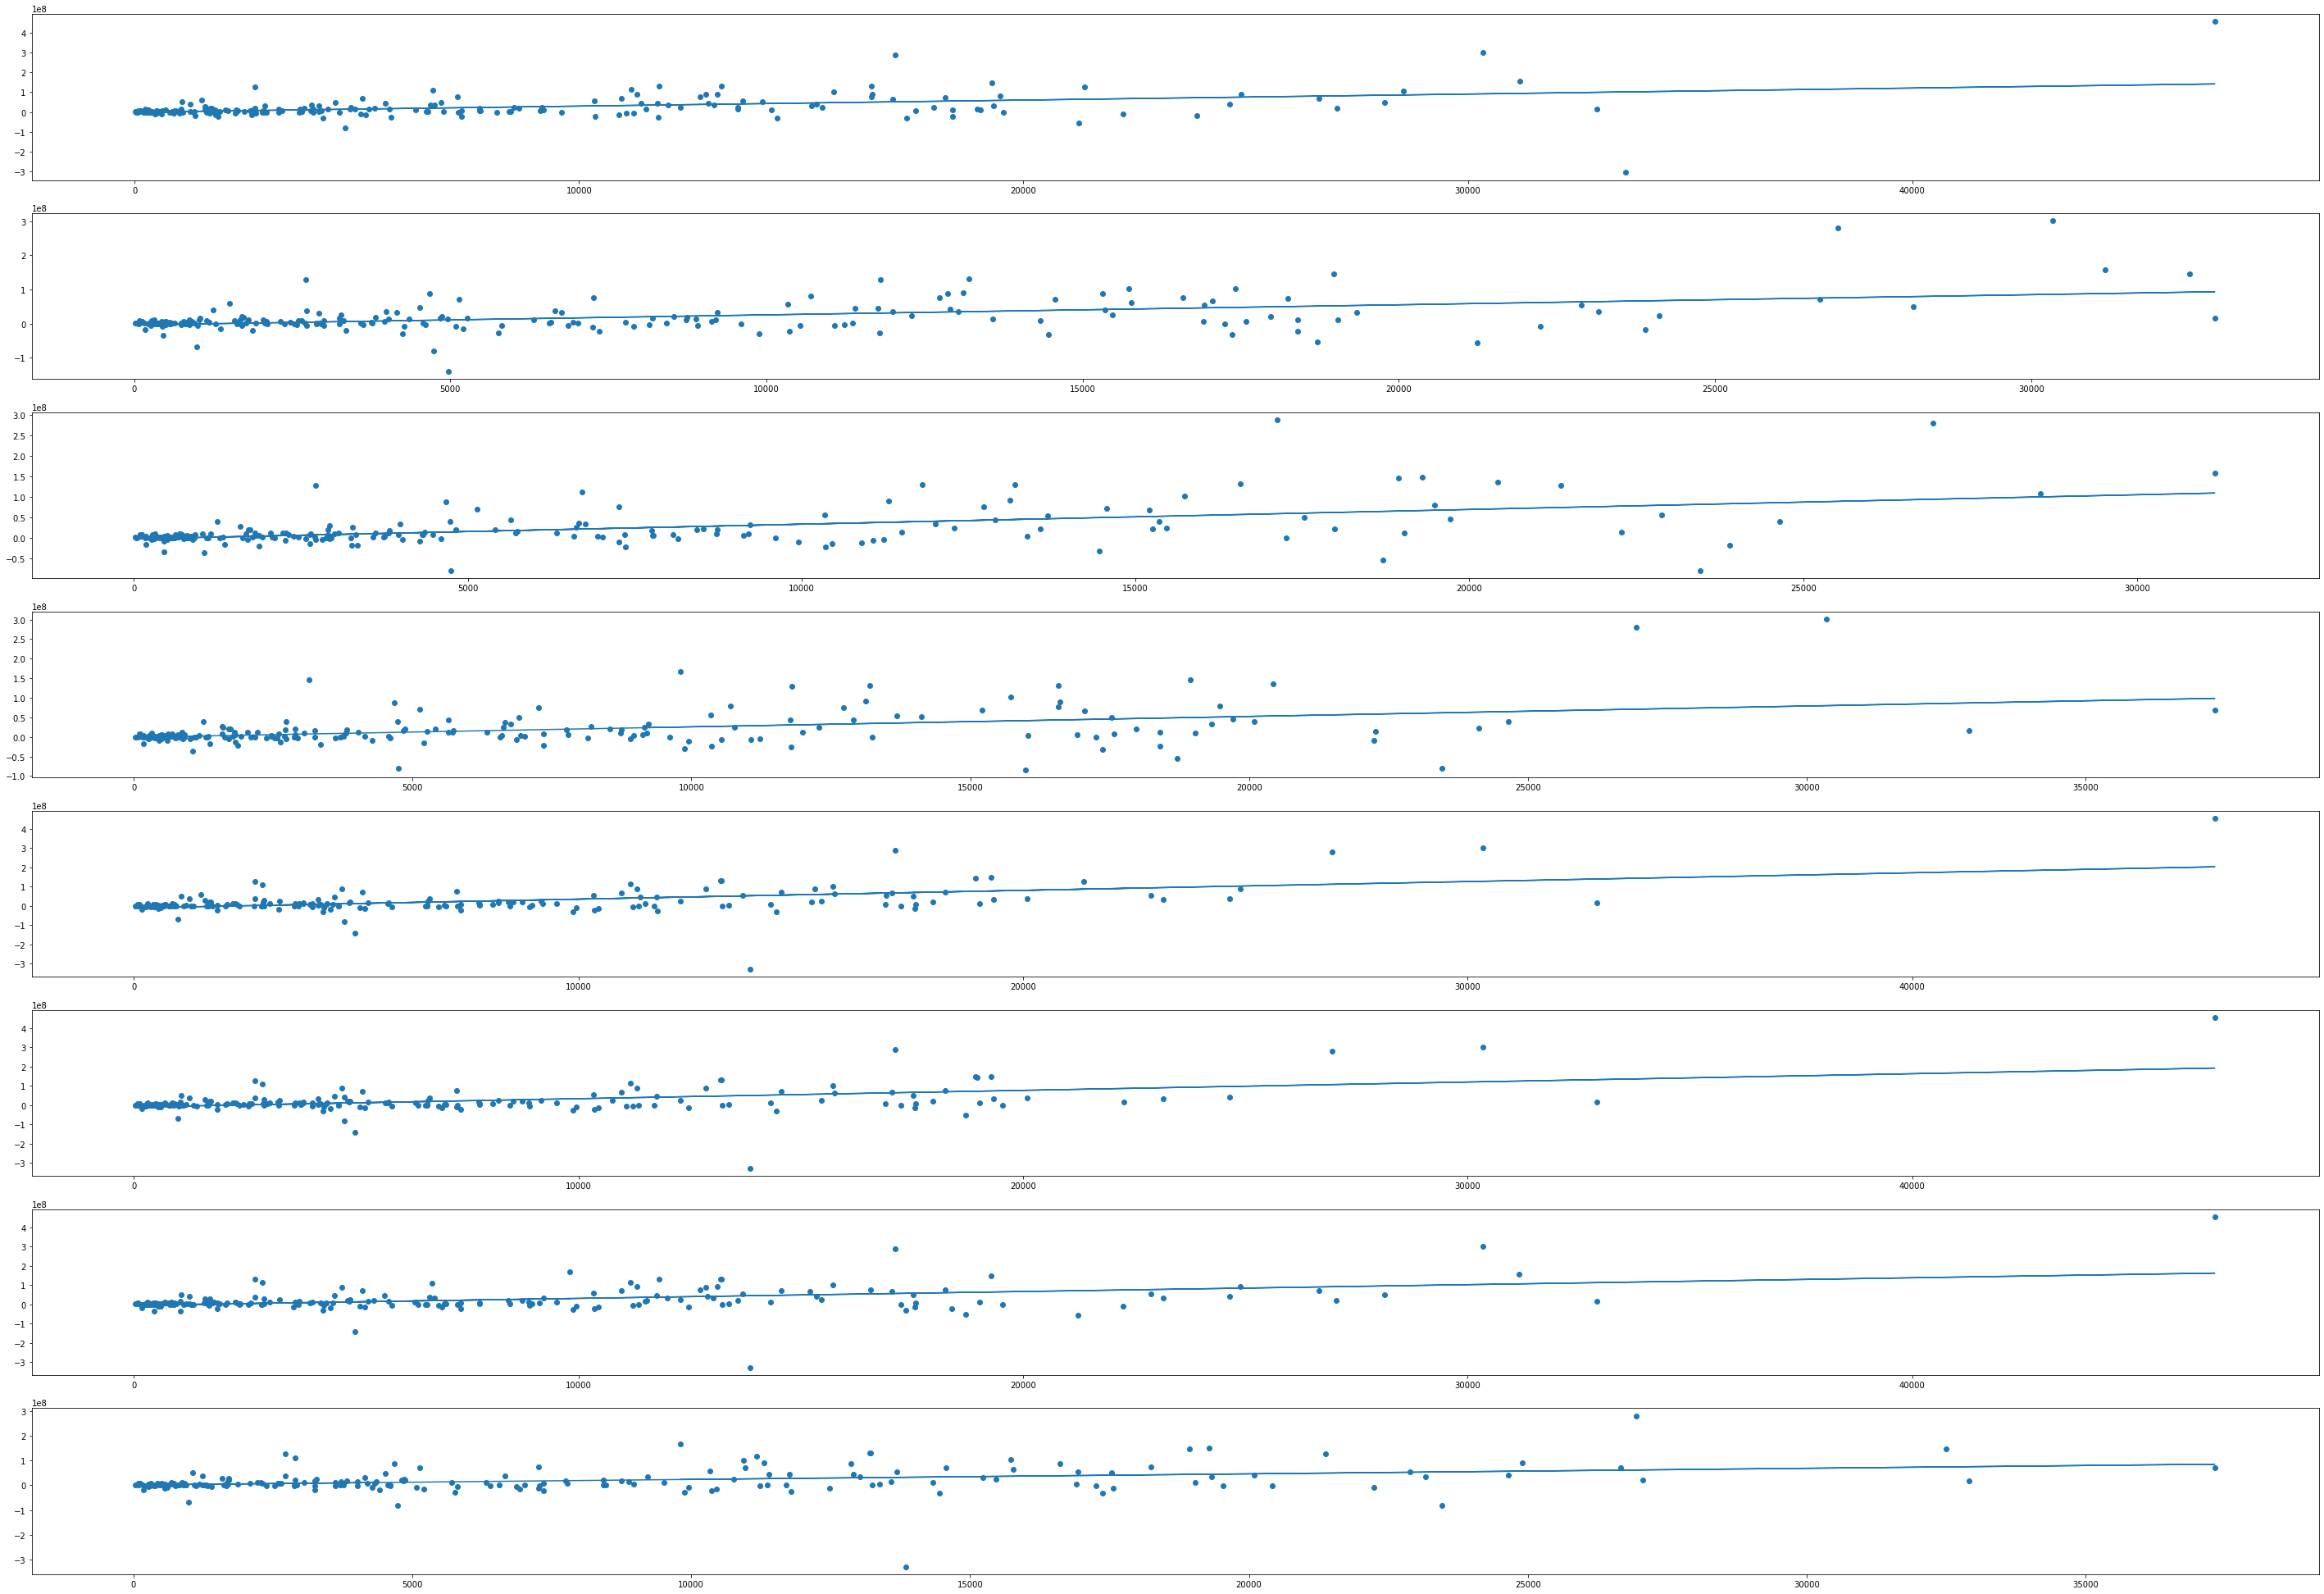

3035.9024227429004x - 757512.3071998487
2957.254977425224x - 4104477.4607878397
3598.9511015985227x - 2987423.599188163
2665.454997706045x - 886223.4751547733
4563.367462619812x - 10382399.149157152
4320.5811996655275x - 9900307.57549609
3570.123083472573x - 5353549.552666557
2245.306495341339x + 859747.8109610494


In [56]:
hospitalPatients = pd.read_excel(r"C:\Users\thewa\OneDrive\Documents\hospitaldatabutbetterbutbetter.xlsx")
hospitalPatients = hospitalPatients.dropna()
lisp = []
lis1 = hospitalPatients["Hospital2020"].tolist()
lis2 = hospitalPatients["Hospital2019"].tolist()
lis3 = hospitalPatients["Hospital2018"].tolist()
lis4 = hospitalPatients["Hospital2017"].tolist()
lis5 = hospitalPatients["Hospital2016"].tolist()
lis6 = hospitalPatients["Hospital2015"].tolist()
lis7 = hospitalPatients["Hospital2014"].tolist()
lis8 = hospitalPatients["Hospital2013"].tolist()

lisp = list(set(lis1) & set(lis2) & set(lis3) & set(lis4) & set(lis5) & set(lis6) & set(lis7) & set(lis8))

patient2020 = []
pr2020 = []
profit2020 = []
patient2019 = []
pr2019 = []
profit2019 = []
patient2018 = []
pr2018 = []
profit2018 = []
patient2017 = []
pr2017 = []
profit2017 = []
patient2016 = []
pr2016 = []
profit2016 = []
patient2015 = []
pr2015 = []
profit2015 = []
patient2014 = []
pr2014 = []
profit2014= []
patient2013 = []
pr2013 = []
profit2013 = []

for val in lisp:
    patient2020.append(hospitalPatients.loc[hospitalPatients["Hospital2020"] == val].iloc[0,1])
    pr2020.append(hospitalPatients.loc[hospitalPatients["Hospital2020"] == val].iloc[0,2])
    profit2020.append(hospitalPatients.loc[hospitalPatients["Hospital2020"] == val].iloc[0,3])

    patient2019.append(hospitalPatients.loc[hospitalPatients["Hospital2019"] == val].iloc[0,1])
    pr2019.append(hospitalPatients.loc[hospitalPatients["Hospital2019"] == val].iloc[0,2])
    profit2019.append(hospitalPatients.loc[hospitalPatients["Hospital2019"] == val].iloc[0,3])

    patient2018.append(hospitalPatients.loc[hospitalPatients["Hospital2018"] == val].iloc[0,1])
    pr2018.append(hospitalPatients.loc[hospitalPatients["Hospital2018"] == val].iloc[0,2])
    profit2018.append(hospitalPatients.loc[hospitalPatients["Hospital2018"] == val].iloc[0,3])

    patient2017.append(hospitalPatients.loc[hospitalPatients["Hospital2017"] == val].iloc[0,1])
    pr2017.append(hospitalPatients.loc[hospitalPatients["Hospital2017"] == val].iloc[0,2])
    profit2017.append(hospitalPatients.loc[hospitalPatients["Hospital2017"] == val].iloc[0,3])

    patient2016.append(hospitalPatients.loc[hospitalPatients["Hospital2016"] == val].iloc[0,1])
    pr2016.append(hospitalPatients.loc[hospitalPatients["Hospital2016"] == val].iloc[0,2])
    profit2016.append(hospitalPatients.loc[hospitalPatients["Hospital2016"] == val].iloc[0,3])

    patient2015.append(hospitalPatients.loc[hospitalPatients["Hospital2015"] == val].iloc[0,1])
    pr2015.append(hospitalPatients.loc[hospitalPatients["Hospital2015"] == val].iloc[0,2])
    profit2015.append(hospitalPatients.loc[hospitalPatients["Hospital2015"] == val].iloc[0,3])

    patient2014.append(hospitalPatients.loc[hospitalPatients["Hospital2014"] == val].iloc[0,1])
    pr2014.append(hospitalPatients.loc[hospitalPatients["Hospital2014"] == val].iloc[0,2])
    profit2014.append(hospitalPatients.loc[hospitalPatients["Hospital2014"] == val].iloc[0,3])

    patient2013.append(hospitalPatients.loc[hospitalPatients["Hospital2013"] == val].iloc[0,1])
    pr2013.append(hospitalPatients.loc[hospitalPatients["Hospital2013"] == val].iloc[0,2])
    profit2013.append(hospitalPatients.loc[hospitalPatients["Hospital2013"] == val].iloc[0,3])

lis = []

figure, axis = plt.subplots(8, 1, figsize=(50,35))
x = np.array(patient2020)
y = np.array(profit2020)
m, b = np.polyfit(x,y,1)
lis.append([m,b])
axis[0].plot(x, m*x+b)
axis[0].scatter(patient2020, profit2020)

x = np.array(patient2019)
y = np.array(profit2019)
m, b = np.polyfit(x,y,1)
lis.append([m,b])
axis[1].plot(x, m*x+b)
axis[1].scatter(patient2019, profit2019)

x = np.array(patient2018)
y = np.array(profit2018)
m, b = np.polyfit(x,y,1)
lis.append([m,b])
axis[2].plot(x, m*x+b)
axis[2].scatter(patient2018, profit2018)

x = np.array(patient2017)
y = np.array(profit2017)
m, b = np.polyfit(x,y,1)
lis.append([m,b])
axis[3].plot(x, m*x+b)
axis[3].scatter(patient2017, profit2017)

x = np.array(patient2016)
y = np.array(profit2016)
m, b = np.polyfit(x,y,1)
lis.append([m,b])
axis[4].plot(x, m*x+b)
axis[4].scatter(patient2016, profit2016)

x = np.array(patient2015)
y = np.array(profit2015)
m, b = np.polyfit(x,y,1)
lis.append([m,b])
axis[5].plot(x, m*x+b)
axis[5].scatter(patient2015, profit2015)

x = np.array(patient2014)
y = np.array(profit2014)
m, b = np.polyfit(x,y,1)
lis.append([m,b])
axis[6].plot(x, m*x+b)
axis[6].scatter(patient2014, profit2014)

x = np.array(patient2013)
y = np.array(profit2013)
m, b = np.polyfit(x,y,1)
lis.append([m,b])
axis[7].plot(x, m*x+b)
axis[7].scatter(patient2013, profit2013)

plt.show()
for val in lis:
    if val[1] < 0:
        print(str(val[0])+"x - " + str(-val[1]))
    else:
        print(str(val[0])+"x + " + str(val[1]))


NORTHERN INYO HOSPITAL  CONTRA COSTA REGIONAL MEDICAL CENTER  \
0                  4351.0                                 318.0   
1                   178.0                                 318.0   
2                  2901.0                                4143.0   
3                  2901.0                                4143.0   
4                  9224.0                               37313.0   
5                 13689.0                                2901.0   
6                   287.0                               12290.0   
7                  1006.0                                6903.0   

   AHMC ANAHEIM REGIONAL MEDICAL CENTER  COLLEGE HOSPITAL COSTA MESA  \
0                                1333.0                        807.0   
1                                1333.0                      13576.0   
2                                1333.0                      46807.0   
3                                1333.0                      46807.0   
4                                2381.0                       2169.0   
5                                3622.0                       6754.0   
6                                2381.0                       6754.0   
7                                8468.0                       3983.0   

   OJAI VALLEY COMMUNITY HOSPITAL  CEDARS-SINAI MEDICAL CENTER  \
0                           287.0                        849.0   
1                           287.0                       2881.0   
2                          8533.0                        905.0   
3                          8533.0                      17054.0   
4                           458.0                       2533.0   
5                          7258.0                       3277.0   
6                           827.0                       2533.0   
7                           458.0                      46807.0   

   EAST LOS ANGELES DOCTOR'S HOSPITAL  CHINO VALLEY MEDICAL CENTER  \
0                               531.0                       3277.0   
1                               339.0                       4966.0   
2                               382.0                       4966.0   
3                               379.0                       4966.0   
4                              9809.0                      17253.0   
5                               569.0                         24.0   
6                               569.0                       1732.0   
7                              2715.0                       4143.0   

   ST. MARY MEDICAL CENTER - APPLE VALLEY  SAN GORGONIO MEMORIAL HOSPITAL  \
0                                  3246.0                          8424.0   
1                                    40.0                          2936.0   
2                                  3246.0                          2936.0   
3                                    40.0                          2936.0   
4                                  2726.0                           559.0   
5                                  3959.0                          3820.0   
6                                 11808.0                          8424.0   
7                                 12732.0                          2637.0   

   KINDRED HOSPITAL - ONTARIO  UNIVERSITY OF CALIFORNIA DAVIS MEDICAL CENTER  \
0                     10343.0                                          436.0   
1                     10343.0                                        11503.0   
2                     10343.0                                         5710.0   
3                     10343.0                                          801.0   
4                       452.0                                         5710.0   
5                       591.0                                          801.0   
6                       575.0                                        32499.0   
7                       575.0                                        27052.0   

   ST. JOSEPH HOSPITAL - ORANGE  MEMORIAL HOSPITAL LOS BANOS  \
0                       26946.0              

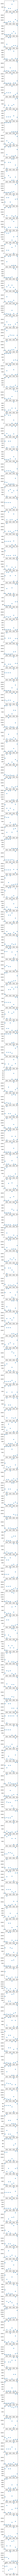

In [57]:
patient2013.append(sum(patient2013))
patient2014.append(sum(patient2014))
patient2015.append(sum(patient2015))
patient2016.append(sum(patient2016))
patient2017.append(sum(patient2017))
patient2018.append(sum(patient2018))
patient2019.append(sum(patient2019))
patient2020.append(sum(patient2020))

patienttotal = []
patienttotal.append(patient2013)
patienttotal.append(patient2014)
patienttotal.append(patient2015)
patienttotal.append(patient2016)
patienttotal.append(patient2017)
patienttotal.append(patient2018)
patienttotal.append(patient2019)
patienttotal.append(patient2020)
lisp.append("Average")

df = pd.DataFrame(patienttotal, columns=lisp)

X = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

figure, axis = plt.subplots(212, 1, figsize=(2.5,500))

for val in range(len(lisp)):
    axis[val].scatter(X, df[lisp[val]])   

df 

regressing stuff


In [58]:
plt.scatter(pr, profit)
plt.plot()

NameError: name 'pr' is not defined

In [ ]:
plt.scatter(patient, profit)
plt.plot()
lin_reg(patient, profit)

In [ ]:
dfbetter = pd.read_excel(r"C:\Users\thewa\OneDrive\Documents\hospitaldatabutbetterbutbetter.xlsx")
sns.pairplot(dfbetter)

Plotting stuff ig

In [ ]:
x = [2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013]
for val in dict:
    y_array = np.array(dict[val])
    y_normal = preprocessing.normalize([y_array])
    plt.scatter(x,y_normal)

    plt.plot()

TypeError: 'type' object is not iterable

Daniel Quality Template

In [ ]:
#DEFINE 3 Hospital 
df = pd.read_excel(r"C:\Users\thewa\OneDrive\Documents\data.xlsx") #pd.read_csv(r"C:\Users\thewa\Downloads\data.csv", encoding='cp1252')
filteredDf1 = df[df["YEAR"] == 2019]
filteredDf2 = df[df["YEAR"] == 2018]
filteredDf3 = df[df["YEAR"] == 2017]
filteredDf4 = df[df["YEAR"] == 2016]

filteredDf1=filteredDf1.dropna()
filteredDf2=filteredDf2.dropna()
filteredDf3=filteredDf3.dropna()
filteredDf4=filteredDf4.dropna()


stateavg1 = filteredDf1[filteredDf1["HOSPITAL"] == "STATEWIDE"]
stateavg2 = filteredDf2[filteredDf2["HOSPITAL"] == "STATEWIDE"]
stateavg3 = filteredDf3[filteredDf3["HOSPITAL"] == "STATEWIDE"]
stateavg4 = filteredDf4[filteredDf4["HOSPITAL"] == "STATEWIDE"]

hospitalList = {}

stateavgdict = {}
for index, row in stateavg1.iterrows():
    stateavgdict[row["Procedure/Condition"]] = float(row["Risk Adjuested Mortality Rate"])


conditionlist = []
weightlist = []
currentHos = ""    

"""
def doit(flag):
    if filteredDf1.iloc[val, 5] == ".":
        flag = False
    else:
        weightlist.append(float(filteredDf1.iloc[val, 5])/float(stateavgdict[filteredDf1.iloc[val, 4]]))
    if flag:
        conditionlist.append(filteredDf1.iloc[val, 7])

def avrgit(lis1, lis2):
    lis2sum = 0
    for val in lis2:
        lis2sum += int(val)
    summ = 0
    for val in range(len(lis1)):
        summ += float(lis1[val]) * float(lis2[val])/lis2sum
    return(summ)

for val in range(len(filteredDf1.index)-1):
    
    flag = True
    
    if filteredDf1.iloc[val, 2] != currentHos:
        hospitalList[currentHos.upper()] = avrgit(weightlist, conditionlist)
        currentHos = filteredDf1.iloc[val, 2]
        conditionlist = []
        weightlist = []
    doit(flag)
    
hospitalList[currentHos.upper()] = avrgit(weightlist, conditionlist)
"""
def doit():
    weightlist.append(float(filteredDf1.iloc[val, 5])/float(stateavgdict[filteredDf1.iloc[val, 4]]))
    #DEFINE 3 Hospital 
df = pd.read_excel(r"C:\Users\thewa\OneDrive\Documents\data.xlsx") #pd.read_csv(r"C:\Users\thewa\Downloads\data.csv", encoding='cp1252')
filteredDf1 = df[df["YEAR"] == 2019]
filteredDf2 = df[df["YEAR"] == 2018]
filteredDf3 = df[df["YEAR"] == 2017]
filteredDf4 = df[df["YEAR"] == 2016]

filteredDf1=filteredDf1.dropna()
filteredDf2=filteredDf2.dropna()
filteredDf3=filteredDf3.dropna()
filteredDf4=filteredDf4.dropna()


stateavg1 = filteredDf1[filteredDf1["HOSPITAL"] == "STATEWIDE"]
stateavg2 = filteredDf2[filteredDf2["HOSPITAL"] == "STATEWIDE"]
stateavg3 = filteredDf3[filteredDf3["HOSPITAL"] == "STATEWIDE"]
stateavg4 = filteredDf4[filteredDf4["HOSPITAL"] == "STATEWIDE"]

hospitalList1 = {}
hospitalList2 = {}
hospitalList3 = {}
hospitalList4 = {}

stateavgdict1 = {}
for index, row in stateavg1.iterrows():
    stateavgdict1[row["Procedure/Condition"]] = float(row["Risk Adjuested Mortality Rate"])

stateavgdict2 = {}
for index, row in stateavg2.iterrows():
    stateavgdict2[row["Procedure/Condition"]] = float(row["Risk Adjuested Mortality Rate"])

stateavgdict3 = {}
for index, row in stateavg3.iterrows():
    stateavgdict3[row["Procedure/Condition"]] = float(row["Risk Adjuested Mortality Rate"])

stateavgdict4 = {}
for index, row in stateavg4.iterrows():
    stateavgdict4[row["Procedure/Condition"]] = float(row["Risk Adjuested Mortality Rate"])


conditionlist = []
weightlist = []
currentHos = ""    

def doit(filteredDf1, stateavgdict):
    weightlist.append(float(filteredDf1.iloc[val, 5])/float(stateavgdict[filteredDf1.iloc[val, 4]]))
    conditionlist.append(filteredDf1.iloc[val, 7])

def avrgit(lis1, lis2):
    lis2sum = 0
    for val in lis2:
        lis2sum += int(val)
    summ = 0
    for val in range(len(lis1)):
        summ += float(lis1[val]) * float(lis2[val])/lis2sum
    return(summ)

currentHos = ""
c = 0
for val in range(len(filteredDf1.index)-1):
    if filteredDf1.iloc[val, 2] == currentHos:
        c += 1
    else:
        currentHos = filteredDf1.iloc[val, 2]
        conditionlist = []
        weightlist = []
        c = 1
    doit(filteredDf1, stateavgdict1)
    if c == 12:
        hospitalList1[currentHos.upper()] = avrgit(weightlist, conditionlist)

currentHos = ""
c = 0
for val in range(len(filteredDf2.index)-1):
    if filteredDf2.iloc[val, 2] == currentHos:
        c += 1
    else:
        currentHos = filteredDf2.iloc[val, 2]
        conditionlist = []
        weightlist = []
        c = 1
    doit(filteredDf2, stateavgdict2)
    if c == 12:
        hospitalList2[currentHos.upper()] = avrgit(weightlist, conditionlist)

currentHos = ""
c = 0
for val in range(len(filteredDf3.index)-1):
    if filteredDf3.iloc[val, 2] == currentHos:
        c += 1
    else:
        currentHos = filteredDf3.iloc[val, 2]
        conditionlist = []
        weightlist = []
        c = 1
    doit(filteredDf3, stateavgdict3)
    if c == 12:
        hospitalList3[currentHos.upper()] = avrgit(weightlist, conditionlist)

currentHos = ""
c = 0
for val in range(len(filteredDf4.index)-1):
    if filteredDf4.iloc[val, 2] == currentHos:
        c += 1
    else:
        currentHos = filteredDf4.iloc[val, 2]
        conditionlist = []
        weightlist = []
        c = 1
    doit(filteredDf4, stateavgdict4)
    if c == 12:
        hospitalList4[currentHos.upper()] = avrgit(weightlist, conditionlist)


['SCRIPPS MEMORIAL HOSPITAL – LA JOLLA', 'COMMUNITY REGIONAL MEDICAL CENTER – FRESNO', 'UC DAVIS MEDICAL CENTER', 'TORRANCE MEMORIAL MEDICAL CENTER', 'PROVIDENCE SAINT JOSEPH MEDICAL CENTER', 'DOCTORS MEDICAL CENTER', 'LOMA LINDA UNIVERSITY MEDICAL CENTER', 'STANFORD HEALTH CARE', 'SAINT JOSEPH HOSPITAL – ORANGE', 'LOS ANGELES COUNTY/UNIVERSITY OF SOUTHERN CALIFORNIA MEDICAL CENTER', 'UC SAN FRANCISCO MEDICAL CENTER', 'HOAG MEMORIAL HOSPITAL PRESBYTERIAN', 'MISSION HOSPITAL REGIONAL MEDICAL CENTER', 'HUNTINGTON MEMORIAL HOSPITAL', 'PENINSULA MEDICAL CENTER', 'MERCY SAN JUAN HOSPITAL', 'KAISER FOUNDATION HOSPITAL – WEST LOS ANGELES', 'KECK HOSPITAL OF UNIVERSITY OF SOUTHERN CALIFORNIA', 'GOOD SAMARITAN HOSPITAL – SAN JOSE', 'GROSSMONT HOSPITAL', 'PRISCILLA CHAN & MARK ZUCKERBERG SAN FRANCISCO GENERAL HOSPITAL & TRAUMA CENTER', 'KAISER FOUNDATION HOSPITAL – ORANGE COUNTY – ANAHEIM', 'KAISER FOUNDATION HOSPITAL – SUNSET', 'SANTA BARBARA COTTAGE HOSPITAL', 'KAISER FOUNDATION HOSPITAL – PAN

In [1]:
fd20 = pd.read_excel(r"C:\Users\thewa\Downloads\hadr-18.xlsx")
fd20 = fd20.loc[(fd20["DAY_PER"] == 365) & (fd20["TYPE_HOSP"] != "Kaiser") & (fd20["ALOS_ALL"] != 0)].reset_index(drop = True)

fd19 = pd.read_excel(r"C:\Users\thewa\Downloads\hadr-17.xlsx")
fd19 = fd19.loc[(fd19["DAY_PER"] == 365) & (fd19["TYPE_HOSP"] != "Kaiser") & (fd19["ALOS_ALL"] != 0)].reset_index(drop = True)

commonhos = list(set(fd20["FAC_NAME"].tolist()) & set(fd19["FAC_NAME"].tolist()))

fd19 = fd19.loc[fd19["FAC_NAME"].isin(commonhos)].reset_index(drop=True)
fd19 = fd20.loc[fd20["FAC_NAME"].isin(commonhos)].reset_index(drop=True)

fd19["NEW_NET_PT_REV"] = fd20["NET_INCOME"] 

fd19

x = fd19.corr()

print(x[abs(x["NEW_NET_PT_REV"]) > 0.3]["NEW_NET_PT_REV"])
print(x.loc["NET_PT_REV", "NEW_NET_PT_REV"])

x

NameError: name 'pd' is not defined

Correlation between Hospital Health and Finance

In [ ]:
#DEFINE 3 Hospital 
df = pd.read_excel(r"C:\Users\thewa\OneDrive\Documents\data.xlsx") #pd.read_csv(r"C:\Users\thewa\Downloads\data.csv", encoding='cp1252')
filteredDf1 = df[df["YEAR"] == 2019]
filteredDf2 = df[df["YEAR"] == 2018]
filteredDf3 = df[df["YEAR"] == 2017]
filteredDf4 = df[df["YEAR"] == 2016]

filteredDf1=filteredDf1.dropna()
filteredDf2=filteredDf2.dropna()
filteredDf3=filteredDf3.dropna()
filteredDf4=filteredDf4.dropna()


stateavg1 = filteredDf1[filteredDf1["HOSPITAL"] == "STATEWIDE"]
stateavg2 = filteredDf2[filteredDf2["HOSPITAL"] == "STATEWIDE"]
stateavg3 = filteredDf3[filteredDf3["HOSPITAL"] == "STATEWIDE"]
stateavg4 = filteredDf4[filteredDf4["HOSPITAL"] == "STATEWIDE"]

hospitalList = {}

stateavgdict = {}
for index, row in stateavg1.iterrows():
    stateavgdict[row["Procedure/Condition"]] = float(row["Risk Adjuested Mortality Rate"])


conditionlist = []
weightlist = []
currentHos = ""    
"""
def doit():
    weightlist.append(float(filteredDf1.iloc[val, 5])/float(stateavgdict[filteredDf1.iloc[val, 4]]))
    #DEFINE 3 Hospital 
filteredDf1 = df[df["YEAR"] == 2019]
filteredDf2 = df[df["YEAR"] == 2018]
filteredDf3 = df[df["YEAR"] == 2017]
filteredDf4 = df[df["YEAR"] == 2016]

filteredDf1=filteredDf1.dropna()
filteredDf2=filteredDf2.dropna()
filteredDf3=filteredDf3.dropna()
filteredDf4=filteredDf4.dropna()


stateavg1 = filteredDf1[filteredDf1["HOSPITAL"] == "STATEWIDE"]
stateavg2 = filteredDf2[filteredDf2["HOSPITAL"] == "STATEWIDE"]
stateavg3 = filteredDf3[filteredDf3["HOSPITAL"] == "STATEWIDE"]
stateavg4 = filteredDf4[filteredDf4["HOSPITAL"] == "STATEWIDE"]
"""

hospitalList1 = {}
hospitalList2 = {}
hospitalList3 = {}
hospitalList4 = {}

stateavgdict1 = {}
for index, row in stateavg1.iterrows():
    stateavgdict1[row["Procedure/Condition"]] = float(row["Risk Adjuested Mortality Rate"])

stateavgdict2 = {}
for index, row in stateavg2.iterrows():
    stateavgdict2[row["Procedure/Condition"]] = float(row["Risk Adjuested Mortality Rate"])

stateavgdict3 = {}
for index, row in stateavg3.iterrows():
    stateavgdict3[row["Procedure/Condition"]] = float(row["Risk Adjuested Mortality Rate"])

stateavgdict4 = {}
for index, row in stateavg4.iterrows():
    stateavgdict4[row["Procedure/Condition"]] = float(row["Risk Adjuested Mortality Rate"])


conditionlist = []
weightlist = []
currentHos = ""    

def doit(filteredDf1, stateavgdict):
    weightlist.append(float(filteredDf1.iloc[val, 5])/float(stateavgdict[filteredDf1.iloc[val, 4]]))
    conditionlist.append(filteredDf1.iloc[val, 7])

def avrgit(lis1, lis2):
    lis2sum = 0
    for val in lis2:
        lis2sum += int(val)
    summ = 0
    for val in range(len(lis1)):
        summ += float(lis1[val]) * float(lis2[val])/lis2sum
    return(summ)

currentHos = ""
c = 0
for val in range(len(filteredDf1.index)-1):
    if filteredDf1.iloc[val, 2] == currentHos:
        c += 1
    else:
        currentHos = filteredDf1.iloc[val, 2]
        conditionlist = []
        weightlist = []
        c = 1
    doit(filteredDf1, stateavgdict1)
    if c == 12:
        hospitalList1[currentHos.upper()] = 1/avrgit(weightlist, conditionlist)

currentHos = ""
c = 0
for val in range(len(filteredDf2.index)-1):
    if filteredDf2.iloc[val, 2] == currentHos:
        c += 1
    else:
        currentHos = filteredDf2.iloc[val, 2]
        conditionlist = []
        weightlist = []
        c = 1
    doit(filteredDf2, stateavgdict2)
    if c == 12:
        hospitalList2[currentHos.upper()] = avrgit(weightlist, conditionlist)

currentHos = ""
c = 0
for val in range(len(filteredDf3.index)-1):
    if filteredDf3.iloc[val, 2] == currentHos:
        c += 1
    else:
        currentHos = filteredDf3.iloc[val, 2]
        conditionlist = []
        weightlist = []
        c = 1
    doit(filteredDf3, stateavgdict3)
    if c == 12:
        hospitalList3[currentHos.upper()] = avrgit(weightlist, conditionlist)

currentHos = ""
c = 0
for val in range(len(filteredDf4.index)-1):
    if filteredDf4.iloc[val, 2] == currentHos:
        c += 1
    else:
        currentHos = filteredDf4.iloc[val, 2]
        conditionlist = []
        weightlist = []
        c = 1
    doit(filteredDf4, stateavgdict4)
    if c == 12:
        hospitalList4[currentHos.upper()] = avrgit(weightlist, conditionlist)

"""
commonhos = list(set(hospitalList1.keys()) & set(hospitalList2.keys()) & set(hospitalList3.keys()) & set(hospitalList4.keys()))
print(commonhos)
print(len(commonhos))
"""
hospitalList1.keys()

dict_keys(['STATEWIDE', 'ALTA BATES SUMMIT MEDICAL CENTER', 'HIGHLAND HOSPITAL', 'KAISER FOUNDATION HOSPITAL – OAKLAND/RICHMOND', 'KAISER FOUNDATION HOSPITAL – SAN LEANDRO', 'WASHINGTON HOSPITAL – FREMONT', 'ENLOE MEDICAL CENTER – ESPLANADE', 'JOHN MUIR MEDICAL CENTER – WALNUT CREEK CAMPUS', 'KAISER FOUNDATION HOSPITAL – WALNUT CREEK', 'COMMUNITY REGIONAL MEDICAL CENTER – FRESNO', 'KAISER FOUNDATION HOSPITAL – FRESNO', 'SAINT AGNES MEDICAL CENTER', 'SAINT JOSEPH HOSPITAL – EUREKA', 'BAKERSFIELD MEMORIAL HOSPITAL', 'ADVENTIST HEALTH GLENDALE', 'ADVENTIST HEALTH WHITE MEMORIAL', 'ANTELOPE VALLEY HOSPITAL', 'CEDARS-SINAI MEDICAL CENTER', 'GARFIELD MEDICAL CENTER', 'GLENDALE MEMORIAL HOSPITAL AND MEDICAL CENTER', 'GOOD SAMARITAN HOSPITAL – LOS ANGELES', 'HUNTINGTON MEMORIAL HOSPITAL', 'KAISER FOUNDATION HOSPITAL – BALDWIN PARK', 'KAISER FOUNDATION HOSPITAL – DOWNEY', 'KAISER FOUNDATION HOSPITAL – PANORAMA CITY', 'KAISER FOUNDATION HOSPITAL – SOUTH BAY', 'KAISER FOUNDATION HOSPITAL – SUNSET

In [ ]:
fd20 = pd.read_excel(r"C:\Users\thewa\Downloads\hadr-20.xlsx")
fd20 = fd20.loc[(fd20["DAY_PER"] == 366) & (fd20["TYPE_HOSP"] != "Kaiser") & (fd20["ALOS_ALL"] != 0)].reset_index(drop = True)

fd19 = pd.read_excel(r"C:\Users\thewa\Downloads\hadr-19 (1).xlsx")
fd19 = fd19.loc[(fd19["DAY_PER"] == 365) & (fd19["TYPE_HOSP"] != "Kaiser") & (fd19["ALOS_ALL"] != 0)].reset_index(drop = True)

fd18 = pd.read_excel(r"C:\Users\thewa\Downloads\hadr-18.xlsx")
fd18 = fd18.loc[(fd18["DAY_PER"] == 365) & (fd18["TYPE_HOSP"] != "Kaiser") & (fd18["ALOS_ALL"] != 0)].reset_index(drop = True)


for val in fd18["FAC_NAME"]:
    val = val.upper()

commonhos = list(set(fd18["FAC_NAME"].tolist()) & set(hospitalList1.keys()))
commonhos.sort()
print(commonhos)
fd18 = fd18.loc[fd18["FAC_NAME"].isin(commonhos)].reset_index(drop=True)

end = []
for val in commonhos:
    end.append(hospitalList1[val])
        
fd18["quality"] = end

x = fd18.corr()
print(x[abs(x["quality"]) > 0.3]["quality"])

x

['ADVENTIST HEALTH GLENDALE', 'ADVENTIST HEALTH WHITE MEMORIAL', 'ANTELOPE VALLEY HOSPITAL', 'ARROWHEAD REGIONAL MEDICAL CENTER', 'BAKERSFIELD MEMORIAL HOSPITAL', 'CEDARS-SINAI MEDICAL CENTER', 'COMMUNITY HOSPITAL OF THE MONTEREY PENINSULA', 'DESERT REGIONAL MEDICAL CENTER', 'EISENHOWER MEDICAL CENTER', 'GARFIELD MEDICAL CENTER', 'HIGHLAND HOSPITAL', 'HOAG MEMORIAL HOSPITAL PRESBYTERIAN', 'HUNTINGTON MEMORIAL HOSPITAL', 'KAWEAH DELTA MEDICAL CENTER', 'LAKEWOOD REGIONAL MEDICAL CENTER', 'LOMA LINDA UNIVERSITY MEDICAL CENTER', 'LOS ROBLES HOSPITAL AND MEDICAL CENTER', 'MEMORIALCARE LONG BEACH MEDICAL CENTER', 'MERCY GENERAL HOSPITAL', 'MERCY SAN JUAN HOSPITAL', 'MISSION HOSPITAL REGIONAL MEDICAL CENTER', 'NORTHRIDGE HOSPITAL MEDICAL CENTER', 'PALOMAR HEALTH DOWNTOWN CAMPUS', 'POMONA VALLEY HOSPITAL MEDICAL CENTER', 'PROVIDENCE HOLY CROSS MEDICAL CENTER', 'PROVIDENCE TARZANA MEDICAL CENTER', 'QUEEN OF THE VALLEY MEDICAL CENTER', 'RIVERSIDE COMMUNITY HOSPITAL', 'RONALD REAGAN UCLA MEDICAL 

FAC_NO  DAY_PER       HSA      HFPA  ER_DESIG   BED_LIC  \
FAC_NO         1.000000      NaN  0.014920  0.084952  0.184508  0.179798   
DAY_PER             NaN      NaN       NaN       NaN       NaN       NaN   
HSA            0.014920      NaN  1.000000  0.929837 -0.147453  0.265496   
HFPA           0.084952      NaN  0.929837  1.000000 -0.076891  0.205923   
ER_DESIG       0.184508      NaN -0.147453 -0.076891  1.000000 -0.509325   
BED_LIC        0.179798      NaN  0.265496  0.205923 -0.509325  1.000000   
BED_AVL        0.066388      NaN  0.229688  0.151896 -0.457542  0.934185   
BED_STF        0.042030      NaN  0.150469  0.089853 -0.553818  0.842314   
DAY_MCAR_TR    0.057191      NaN  0.012676 -0.080536 -0.407531  0.630405   
DAY_MCAR_MC    0.168122      NaN  0.541163  0.628945 -0.134533  0.519173   
DAY_MCAL_TR   -0.023973      NaN  0.005895 -0.020155 -0.210504  0.395430   
DAY_MCAL_MC    0.039267      NaN  0.058178  0.064946 -0.370864  0.429294   
DAY_CNTY       0.085490      NaN -0.205939 -0.310966 -0.175074  0.217335   
DAY_THRD_TR    0.119479      NaN  0.111922  0.166085 -0.181225  0.261867   
DAY_THRD_MC    0.005252      NaN  0.160423  0.096921 -0.443326  0.667590   
DAY_OTH_IND    0.329713      NaN  0.107422  0.145559 -0.323200  0.369653   
DAY_OTH       -0.224613      NaN  0.264097  0.217592 -0.491837  0.222296   
DAY_TOT        0.065634      NaN  0.184797  0.129725 -0.572554  0.855226   
DIS_MCAR_TR    0.080328      NaN  0.047011 -0.041720 -0.347324  0.612233   
DIS_MCAR_MC    0.122613      NaN  0.561610  0.640549 -0.036468  0.417388   
DIS_MCAL_TR    0.045806      NaN  0.070239  0.033415 -0.084088  0.395225   
DIS_MCAL_MC    0.085323      NaN  0.136122  0.116275 -0.161044  0.430856   
DIS_CNTY       0.194332      NaN -0.190897 -0.313378 -0.111072  0.239005   
DIS_THRD_TR    0.014767      NaN  0.135679  0.173730 -0.067382  0.130360   
DIS_THRD_MC    0.015495      NaN  0.219158  0.171552 -0.350522  0.688039   
DIS_OTH_IND    0.278879      NaN  0.170292  0.231414 -0.310285  0.377409   
DIS_OTH       -0.129987      NaN  0.325984  0.279346 -0.400785  0.251359   
DIS_TOT        0.102503      NaN  0.311523  0.258002 -0.423840  0.889517   
BED_ACUTE      0.196976      NaN  0.297142  0.264631 -0.460215  0.946775   
BED_PSYCH     -0.049724      NaN  0.010179 -0.072914 -0.113892  0.283348   
BED_CHEM      -0.025535      NaN  0.213146  0.096639  0.078573  0.148014   
BED_REHAB      0.206380      NaN -0.259517 -0.319408 -0.207694  0.288110   
BED_LTC       -0.178459      NaN -0.008442 -0.024322  0.045524 -0.048316   
BED_RESDNT          NaN      NaN       NaN       NaN       NaN       NaN   
DAY_ACUTE      0.074851      NaN  0.216322  0.171835 -0.513858  0.818681   
DAY_PSYCH     -0.024644      NaN -0.021294 -0.085229 -0.184060  0.280015   
DAY_CHEM      -0.028418      NaN  0.221655  0.100286  0.082303  0.154297   
DAY_REHAB      0.229067      NaN -0.180625 -0.177739 -0.187631  0.253354   
DAY_LTC       -0.132456      NaN -0.048321 -0.048939 -0.002079 -0.052613   
DAY_RESDNT          NaN      NaN       NaN       NaN       NaN       NaN   
DIS_ACUTE      0.096999      NaN  0.305639  0.259313 -0.411331  0.862881   
DIS_PSYCH     -0.059431      NaN  0.050611  0.011381 -0.088002  0.197571   
DIS_CHEM      -0.028225      NaN  0.220912  0.099923  0.083456  0.153406   
DIS_REHAB      0.235913      NaN -0.169471 -0.155316 -0.117704  0.211051   
DIS_LTC        0.157672      NaN  0.125112  0.101269  0.304306 -0.075693   
DIS_RESDNT          NaN      NaN       NaN       NaN       NaN       NaN   
OCC_LIC       -0.149720      NaN  0.013254  0.007492 -0.407518  0.037358   
OCC_AVL        0.013795      NaN  0.040875  0.054654 -0.582797  0.251410   
ALOS_ALL      -0.134112      NaN -0.229245 -0.233007 -0.485471  0.161426   
ALOS_EXLTC     0.003888      NaN -0.249838 -0.269212 -0.583741  0.272136   
BAS_NURSRY    -0.150522      NaN  0.134995  0.058515 -0.251108  0.379761   
DAY_NURSRY    -0.074366      NaN  0.153371 -0.005090 -0.079902  0

In [ ]:
hospitalData = pd.read_excel(r"C:\Users\thewa\Downloads\hadr-20.xlsx")
ptgr2020 = hospitalData[["FAC_NAME", "DIS_TOT", "GR_PT_REV", 'GR_IP_TOT', "NET_INCOME", "VIS_TOT", "GR_OP_TOT", "EXP_DLY", "EXP_AMB", "EXP_ANC", "EXP_PIP", "EXP_POP", "EXP_RES", "EXP_ED", "EXP_GEN", "EXP_FISC", "EXP_ADM", "EXP_UNASSG", "EXP_SAL", "EXP_BEN", "EXP_PHYS", "EXP_OTHPRO", "EXP_SUPP", "EXP_PURCH", "EXP_DEPRE", "EXP_LEASES", "EXP_INSUR", "EXP_INTRST", "EXP_OTH"]]
hospitalData = pd.read_excel(r"C:\Users\thewa\Downloads\hadr-19 (1).xlsx")
ptgr2019 = hospitalData[["FAC_NAME", "DIS_TOT", "GR_PT_REV", 'GR_IP_TOT', "NET_INCOME", "VIS_TOT", "GR_OP_TOT", "EXP_DLY", "EXP_AMB", "EXP_ANC", "EXP_PIP", "EXP_POP", "EXP_RES", "EXP_ED", "EXP_GEN", "EXP_FISC", "EXP_ADM", "EXP_UNASSG", "EXP_SAL", "EXP_BEN", "EXP_PHYS", "EXP_OTHPRO", "EXP_SUPP", "EXP_PURCH", "EXP_DEPRE", "EXP_LEASES", "EXP_INSUR", "EXP_INTRST", "EXP_OTH"]]
hospitalData = pd.read_excel(r"C:\Users\thewa\Downloads\hadr-18.xlsx")
ptgr2018 = hospitalData[["FAC_NAME", "DIS_TOT", "GR_PT_REV", 'GR_IP_TOT', "NET_INCOME", "VIS_TOT", "GR_OP_TOT", "EXP_DLY", "EXP_AMB", "EXP_ANC", "EXP_PIP", "EXP_POP", "EXP_RES", "EXP_ED", "EXP_GEN", "EXP_FISC", "EXP_ADM", "EXP_UNASSG", "EXP_SAL", "EXP_BEN", "EXP_PHYS", "EXP_OTHPRO", "EXP_SUPP", "EXP_PURCH", "EXP_DEPRE", "EXP_LEASES", "EXP_INSUR", "EXP_INTRST", "EXP_OTH"]]
hospitalData = pd.read_excel(r"C:\Users\thewa\Downloads\hadr-17.xlsx")
ptgr2017 = hospitalData[["FAC_NAME", "DIS_TOT", "GR_PT_REV", 'GR_IP_TOT', "NET_INCOME", "VIS_TOT", "GR_OP_TOT", "EXP_DLY", "EXP_AMB", "EXP_ANC", "EXP_PIP", "EXP_POP", "EXP_RES", "EXP_ED", "EXP_GEN", "EXP_FISC", "EXP_ADM", "EXP_UNASSG", "EXP_SAL", "EXP_BEN", "EXP_PHYS", "EXP_OTHPRO", "EXP_SUPP", "EXP_PURCH", "EXP_DEPRE", "EXP_LEASES", "EXP_INSUR", "EXP_INTRST", "EXP_OTH"]]
hospitalData = pd.read_excel(r"C:\Users\thewa\Downloads\hadf16-_092018.xlsx")
ptgr2016 = hospitalData[["FAC_NAME", "DIS_TOT", "GR_PT_REV", 'GR_IP_TOT', "NET_INCOME", "VIS_TOT", "GR_OP_TOT"]]
hospitalData = pd.read_excel(r"C:\Users\thewa\Downloads\hafd15-32018-extract.xlsx")
ptgr2015 = hospitalData[["FAC_NAME", "DIS_TOT", "GR_PT_REV", 'GR_IP_TOT', "NET_INCOME", "VIS_TOT", "GR_OP_TOT"]]
hospitalData = pd.read_excel(r"C:\Users\thewa\Downloads\hafd14-42017-extract.xlsx")
ptgr2014= hospitalData[["FAC_NAME", "DIS_TOT", "GR_PT_REV", 'GR_IP_TOT', "NET_INCOME", "VIS_TOT", "GR_OP_TOT"]]
hospitalData = pd.read_excel(r"C:\Users\thewa\Downloads\hafd13-92015-extract.xls")
ptgr2013 = hospitalData[["FAC_NAME", "DIS_TOT", "GR_PT_REV", 'GR_IP_TOT', "NET_INCOME", "VIS_TOT", "GR_OP_TOT"]]
hospitalData = pd.read_excel(r"C:\Users\thewa\Downloads\hafd12-10-2014-extract.xls")
ptgr2012 = hospitalData[["FAC_NAME", "DIS_TOT", "GR_PT_REV", 'GR_IP_TOT', "NET_INCOME", "VIS_TOT", "GR_OP_TOT"]]

ptgross = []
ptnet = []
for index, row in ptgr2019.iterrows():
    if row['DIS_TOT'] == 0:
        ptgross.append(0)
        ptnet.append(0)
    else:
        ptgross.append(int(row['GR_PT_REV'] / row['DIS_TOT']))
        ptnet.append(int(row['NET_INCOME'] / row['DIS_TOT']))

ptgr2019["PT_REV"] = ptgross
ptgr2019["PT_NET"] = ptnet

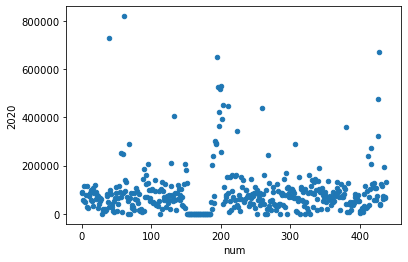

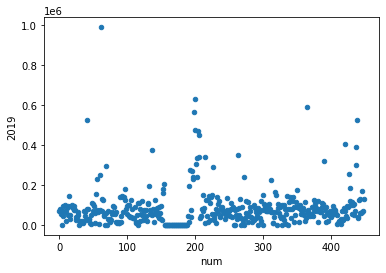

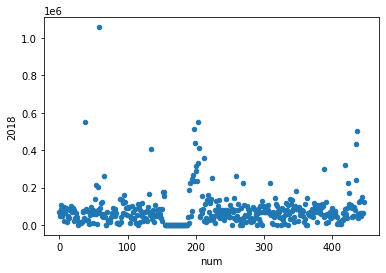

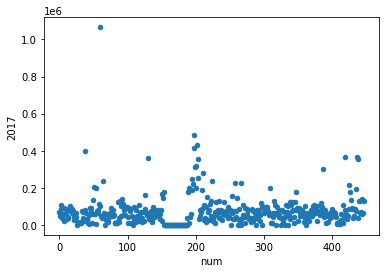

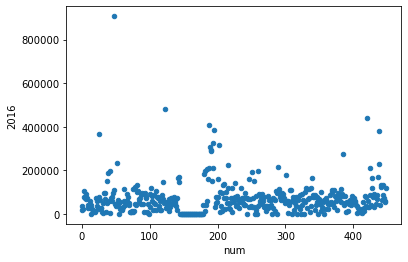

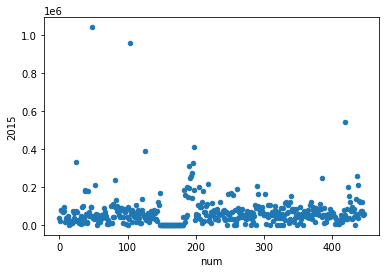

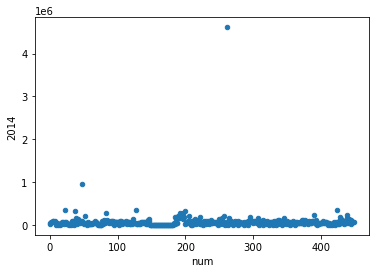

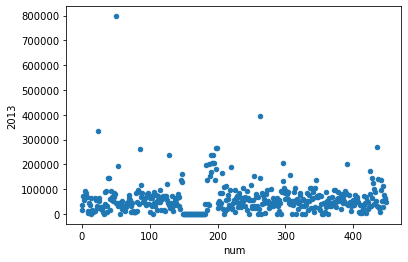

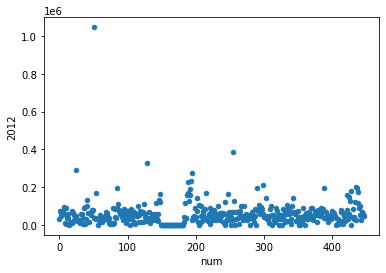

In [ ]:
linearregressdata = []
pprofit = pd.DataFrame()

ptnet = []
for index, row in ptgr2020.iterrows():
    if row['DIS_TOT'] == 0:
        ptnet.append(0)
    else:
        ptnet.append(int(row['GR_IP_TOT'] / row['DIS_TOT']))

pprofit[2020] = ptnet
num = []
for val in range(439):
    num.append(val)
pprofit["num"] = num
pprofit.plot.scatter(x = "num", y = 2020)
linearregressdata.append(pprofit[2020].median())

pprofit = pd.DataFrame()

ptnet = []
for index, row in ptgr2019.iterrows():
    if row['DIS_TOT'] == 0:
        ptnet.append(0)
    else:
        ptnet.append(int(row['GR_IP_TOT'] / row['DIS_TOT']))

pprofit[2019] = ptnet
num = []
for val in range(449):
    num.append(val)
pprofit["num"] = num
pprofit.plot.scatter(x = "num", y = 2019)
linearregressdata.append(pprofit[2019].median())
pprofit = pd.DataFrame()

ptnet = []
for index, row in ptgr2018.iterrows():
    if row['DIS_TOT'] == 0:
        ptnet.append(0)
    else:
        ptnet.append(int(row['GR_IP_TOT'] / row['DIS_TOT']))

pprofit[2018] = ptnet
num = []
for val in range(448):
    num.append(val)
pprofit["num"] = num
pprofit.plot.scatter(x = "num", y = 2018)
linearregressdata.append(pprofit[2018].median())

pprofit = pd.DataFrame()

ptnet = []
for index, row in ptgr2017.iterrows():
    if row['DIS_TOT'] == 0:
        ptnet.append(0)
    else:
        ptnet.append(int(row['GR_IP_TOT'] / row['DIS_TOT']))

pprofit[2017] = ptnet
num = []
for val in range(448):
    num.append(val)
pprofit["num"] = num
pprofit.plot.scatter(x = "num", y = 2017)
linearregressdata.append(pprofit[2017].median())

pprofit = pd.DataFrame()

ptnet = []
for index, row in ptgr2016.iterrows():
    if row['DIS_TOT'] == 0:
        ptnet.append(0)
    else:
        ptnet.append(int(row['GR_IP_TOT'] / row['DIS_TOT']))

pprofit[2016] = ptnet
num = []
for val in range(449):
    num.append(val)
pprofit["num"] = num
pprofit.plot.scatter(x = "num", y = 2016)
linearregressdata.append(pprofit[2016].median())

pprofit = pd.DataFrame()

ptnet = []
for index, row in ptgr2015.iterrows():
    if row['DIS_TOT'] == 0:
        ptnet.append(0)
    else:
        ptnet.append(int(row['GR_IP_TOT'] / row['DIS_TOT']))

pprofit[2015] = ptnet
num = []
for val in range(448):
    num.append(val)
pprofit["num"] = num
pprofit.plot.scatter(x = "num", y = 2015)
linearregressdata.append(pprofit[2015].median())

pprofit = pd.DataFrame()

ptnet = []
for index, row in ptgr2014.iterrows():
    if row['DIS_TOT'] == 0:
        ptnet.append(0)
    else:
        ptnet.append(int(row['GR_IP_TOT'] / row['DIS_TOT']))

pprofit[2014] = ptnet
num = []
for val in range(450):
    num.append(val)
pprofit["num"] = num
pprofit.plot.scatter(x = "num", y = 2014)
linearregressdata.append(pprofit[2014].median())

pprofit = pd.DataFrame()

ptnet = []
for index, row in ptgr2013.iterrows():
    if row['DIS_TOT'] == 0:
        ptnet.append(0)
    else:
        ptnet.append(int(row['GR_IP_TOT'] / row['DIS_TOT']))

pprofit[2013] = ptnet
num = []
for val in range(449):
    num.append(val)
pprofit["num"] = num
pprofit.plot.scatter(x = "num", y = 2013)
linearregressdata.append(pprofit[2013].median())

pprofit = pd.DataFrame()

ptnet = []
for index, row in ptgr2012.iterrows():
    if row['DIS_TOT'] == 0:
        ptnet.append(0)
    else:
        ptnet.append(int(row['GR_IP_TOT'] / row['DIS_TOT']))

pprofit[2012] = ptnet
num = []
for val in range(447):
    num.append(val)
pprofit["num"] = num
pprofit.plot.scatter(x = "num", y = 2012)
linearregressdata.append(pprofit[2012].median())


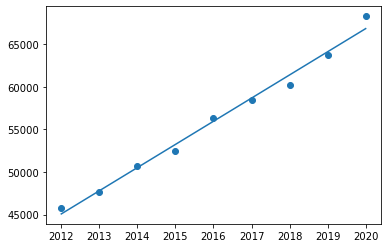

[2719.0583333335708, -5425662.211111591]


In [ ]:
num = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
linearregressdata.reverse()
median = linearregressdata
plt.scatter(x = num, y = median)

x = np.array(num)
y = np.array(median)
mip, bip = np.polyfit(x,y,1)
plt.plot(x, mip*x+bip)
plt.show()
print([mip,bip])

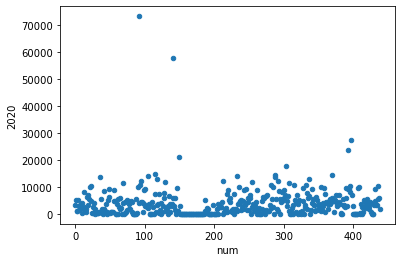

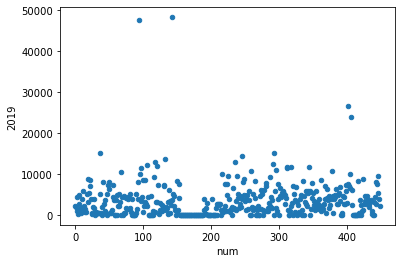

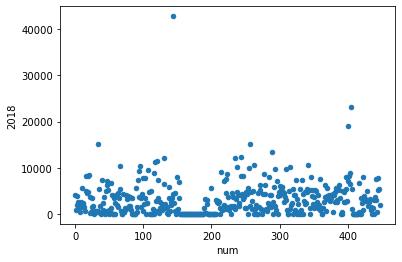

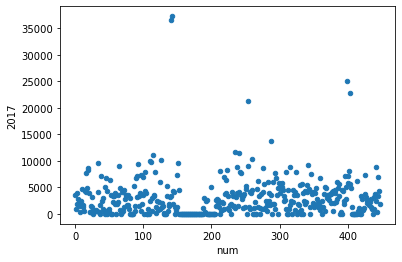

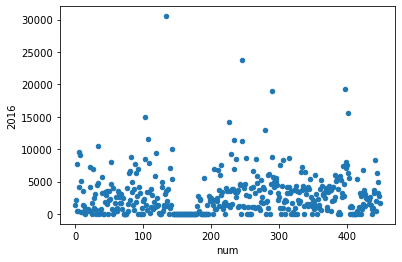

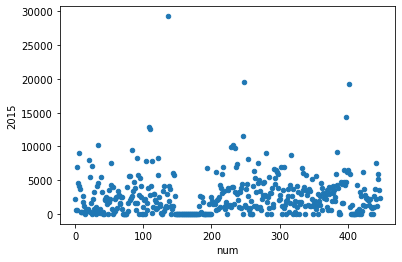

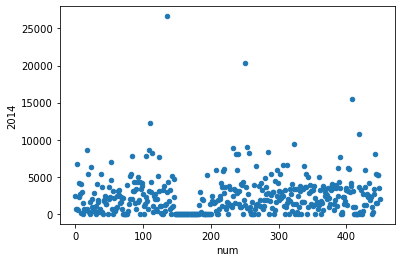

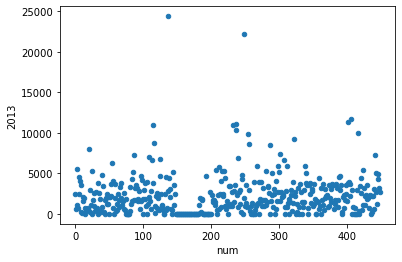

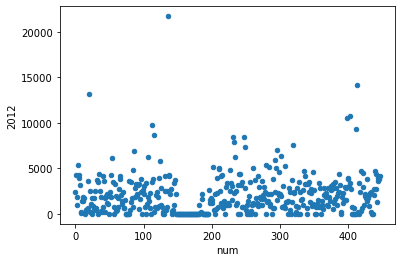

In [ ]:
linearregressdataop = []
pprofit = pd.DataFrame()

ptnet = []
for index, row in ptgr2020.iterrows():
    if row['VIS_TOT'] == 0:
        ptnet.append(0)
    else:
        ptnet.append(int(row['GR_OP_TOT'] / row['VIS_TOT']))

pprofit[2020] = ptnet
num = []
for val in range(439):
    num.append(val)
pprofit["num"] = num
pprofit.plot.scatter(x = "num", y = 2020)
linearregressdataop.append(pprofit[2020].median())

pprofit = pd.DataFrame()

ptnet = []
for index, row in ptgr2019.iterrows():
    if row['VIS_TOT'] == 0:
        ptnet.append(0)
    else:
        ptnet.append(int(row['GR_OP_TOT'] / row['VIS_TOT']))

pprofit[2019] = ptnet
num = []
for val in range(449):
    num.append(val)
pprofit["num"] = num
pprofit.plot.scatter(x = "num", y = 2019)
linearregressdataop.append(pprofit[2019].median())
pprofit = pd.DataFrame()

ptnet = []
for index, row in ptgr2018.iterrows():
    if row['VIS_TOT'] == 0:
        ptnet.append(0)
    else:
        ptnet.append(int(row['GR_OP_TOT'] / row['VIS_TOT']))

pprofit[2018] = ptnet
num = []
for val in range(448):
    num.append(val)
pprofit["num"] = num
pprofit.plot.scatter(x = "num", y = 2018)
linearregressdataop.append(pprofit[2018].median())

pprofit = pd.DataFrame()

ptnet = []
for index, row in ptgr2017.iterrows():
    if row['VIS_TOT'] == 0:
        ptnet.append(0)
    else:
        ptnet.append(int(row['GR_OP_TOT'] / row['VIS_TOT']))

pprofit[2017] = ptnet
num = []
for val in range(448):
    num.append(val)
pprofit["num"] = num
pprofit.plot.scatter(x = "num", y = 2017)
linearregressdataop.append(pprofit[2017].median())

pprofit = pd.DataFrame()

ptnet = []
for index, row in ptgr2016.iterrows():
    if row['VIS_TOT'] == 0:
        ptnet.append(0)
    else:
        ptnet.append(int(row['GR_OP_TOT'] / row['VIS_TOT']))

pprofit[2016] = ptnet
num = []
for val in range(449):
    num.append(val)
pprofit["num"] = num
pprofit.plot.scatter(x = "num", y = 2016)
linearregressdataop.append(pprofit[2016].median())

pprofit = pd.DataFrame()

ptnet = []
for index, row in ptgr2015.iterrows():
    if row['VIS_TOT'] == 0:
        ptnet.append(0)
    else:
        ptnet.append(int(row['GR_OP_TOT'] / row['VIS_TOT']))

pprofit[2015] = ptnet
num = []
for val in range(448):
    num.append(val)
pprofit["num"] = num
pprofit.plot.scatter(x = "num", y = 2015)
linearregressdataop.append(pprofit[2015].median())

pprofit = pd.DataFrame()

ptnet = []
for index, row in ptgr2014.iterrows():
    if row['VIS_TOT'] == 0:
        ptnet.append(0)
    else:
        ptnet.append(int(row['GR_OP_TOT'] / row['VIS_TOT']))

pprofit[2014] = ptnet
num = []
for val in range(450):
    num.append(val)
pprofit["num"] = num
pprofit.plot.scatter(x = "num", y = 2014)
linearregressdataop.append(pprofit[2014].median())

pprofit = pd.DataFrame()

ptnet = []
for index, row in ptgr2013.iterrows():
    if row['VIS_TOT'] == 0:
        ptnet.append(0)
    else:
        ptnet.append(int(row['GR_OP_TOT'] / row['VIS_TOT']))

pprofit[2013] = ptnet
num = []
for val in range(449):
    num.append(val)
pprofit["num"] = num
pprofit.plot.scatter(x = "num", y = 2013)
linearregressdataop.append(pprofit[2013].median())

pprofit = pd.DataFrame()

ptnet = []
for index, row in ptgr2012.iterrows():
    if row['VIS_TOT'] == 0:
        ptnet.append(0)
    else:
        ptnet.append(int(row['GR_OP_TOT'] / row['VIS_TOT']))

pprofit[2012] = ptnet
num = []
for val in range(447):
    num.append(val)
pprofit["num"] = num
pprofit.plot.scatter(x = "num", y = 2012)
linearregressdataop.append(pprofit[2012].median())


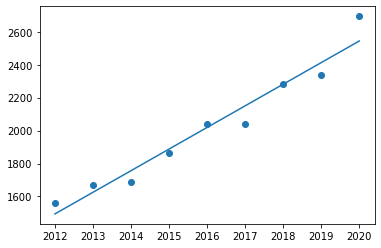

[131.20833333334565, -262496.9444444693]


In [ ]:
num = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
linearregressdataop.reverse()
median = linearregressdataop
plt.scatter(x = num, y = median)

x = np.array(num)
y = np.array(median)
mop, bop = np.polyfit(x,y,1)
plt.plot(x, mop*x+bop)
plt.show()
print([mop,bop])

In [149]:
hospitalData = pd.read_excel(r"C:\Users\thewa\Downloads\hadr-20.xlsx")
ptgr2020 = hospitalData[["FAC_NAME", "DIS_TOT", "GR_PT_REV", 'GR_IP_TOT', "NET_INCOME", "VIS_TOT", "GR_OP_TOT", "EXP_DLY", "EXP_AMB", "EXP_ANC", "EXP_PIP", "EXP_POP", "EXP_RES", "EXP_ED", "EXP_GEN", "EXP_FISC", "EXP_ADM", "EXP_UNASSG", "EXP_SAL", "EXP_BEN", "EXP_PHYS", "EXP_OTHPRO", "EXP_SUPP", "EXP_PURCH", "EXP_DEPRE", "EXP_LEASES", "EXP_INSUR", "EXP_INTRST", "EXP_OTH"]]
hospitalData = pd.read_excel(r"C:\Users\thewa\Downloads\hadr-19 (1).xlsx")
ptgr2019 = hospitalData[["FAC_NAME", "DIS_TOT", "GR_PT_REV", 'GR_IP_TOT', "NET_INCOME", "VIS_TOT", "GR_OP_TOT", "EXP_DLY", "EXP_AMB", "EXP_ANC", "EXP_PIP", "EXP_POP", "EXP_RES", "EXP_ED", "EXP_GEN", "EXP_FISC", "EXP_ADM", "EXP_UNASSG", "EXP_SAL", "EXP_BEN", "EXP_PHYS", "EXP_OTHPRO", "EXP_SUPP", "EXP_PURCH", "EXP_DEPRE", "EXP_LEASES", "EXP_INSUR", "EXP_INTRST", "EXP_OTH"]]

commonlist = list(set(ptgr2020["FAC_NAME"].tolist()) & set(ptgr2019["FAC_NAME"].tolist()))
print(len(commonlist))
ptgr2020 = ptgr2020.drop_duplicates(subset=['FAC_NAME'])
ptgr2019 = ptgr2019.drop_duplicates(subset=['FAC_NAME'])

ptgr2020new = ptgr2020.loc[ptgr2020["FAC_NAME"].isin(commonlist)]
ptgr2019new = ptgr2019.loc[ptgr2019["FAC_NAME"].isin(commonlist)]

y = ptgr2020new["NET_INCOME"].tolist()
x1 = list(np.array(ptgr2020new["DIS_TOT"])*(mip*2020+bip) + np.array(ptgr2020new["VIS_TOT"])*(mop*2020+bop))
x2 = np.array(ptgr2019new["EXP_DLY"])
for val in ["EXP_AMB", "EXP_ANC", "EXP_PIP", "EXP_POP", "EXP_RES", "EXP_ED", "EXP_GEN", "EXP_FISC", "EXP_ADM", "EXP_UNASSG", "EXP_SAL", "EXP_BEN", "EXP_PHYS", "EXP_OTHPRO", "EXP_SUPP", "EXP_PURCH", "EXP_DEPRE", "EXP_LEASES", "EXP_INSUR", "EXP_INTRST", "EXP_OTH"]:
    x2 += np.array(ptgr2019new[val])

x = []
for val in range(len(x1)):
    x.append([x1[val], x2[val]])
print(x)
print(y)

429
[[1195695894.3333325, 871667914], [1455240870.5333304, 815183738], [653964956.088898, 229267968], [1564993286.0222163, 984168622], [1311019857.6444468, 581798364], [283176582.24444604, 152453050], [961986810.6666701, 491705972], [1485882339.8444676, 324097338], [613153216.488887, 321493664], [1264875715.5333462, 523286592], [405657494.6888875, 472437866], [150107768.77777904, 81340118], [170082147.79999977, 95029220], [809312424.2444518, 387180254], [180237174.844443, 60419080], [1457596746.6222138, 916428964], [719210459.5333296, 451430678], [288239506.3999995, 249306300], [345754169.6444421, 391119794], [1293497862.8888788, 1314035334], [1006052282.9111029, 1239507870], [416398132.22221947, 257378590], [469492144.4888926, 62894536], [114962060.19999886, 14103918], [359786915.4888869, 182532822], [1664103767.555548, 850938388], [2019569618.9555564, 1157671466], [83210349.66666572, 0], [197117624.64444235, 75407936], [473289745.02221775, 81816520], [272656966.06666416, 61335824], [

In [125]:
# Plotting to find the values of our constants
fd20 = pd.read_excel(r"C:\Users\thewa\Downloads\hadr-20.xlsx")
fd20 = fd20.loc[(fd20["DAY_PER"] == 366) & (fd20["TYPE_HOSP"] != "Kaiser") & (fd20["ALOS_ALL"] != 0)].reset_index(drop = True)
fd20 = fd20[["FAC_NAME", "NET_PT_REV"]]

fd19 = pd.read_excel(r"C:\Users\thewa\Downloads\hadr-19 (1).xlsx")
fd19 = fd19.loc[(fd19["DAY_PER"] == 365) & (fd19["TYPE_HOSP"] != "Kaiser") & (fd19["ALOS_ALL"] != 0)].reset_index(drop = True)
gr19 = fd19[["FAC_NAME", "DIS_TOT", "NET_PT_REV", "TOT_ASST", "MED_STAFF"]]

net_income = []
tot_asst = []
med_staff = []
future_income = []
dis_tot = []

name = []

for index, row in fd19.iterrows():
    if row["FAC_NAME"] in fd20["FAC_NAME"].unique():
        future_income.append(fd20.loc[fd20["FAC_NAME"] == row["FAC_NAME"]].iloc[0,1])
        med_staff.append(row["MED_STAFF"])
        tot_asst.append(row["TOT_ASST"])
        net_income.append(row["NET_PT_REV"])
        dis_tot.append(row["DIS_TOT"]*1099)
        name.append(row["FAC_NAME"])

bleh = []
for val in range(len(tot_asst)):
    bleh.append([net_income[val], tot_asst[val]])

import statistics

avg_med_staff = sum(med_staff)/len(med_staff)
avg_tot_asst = sum(tot_asst)/len(tot_asst)
avg_net_income = sum(net_income)/len(net_income)
avg_dis_tot = sum(dis_tot)/len(dis_tot)

med_tot_asst = statistics.median(tot_asst)
med_net_income = statistics.median(net_income)

avg_val = [avg_net_income, avg_tot_asst]
med_val = [med_net_income, med_tot_asst]

In [150]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
lis = []

clf.fit(x,y)
coefficients = list(clf.coef_)
coefficients

[0.01760255719400682, 0.0015927208451397322]

In [151]:
import math
dummyx = []
for val in range(429):
    dummyx.append(val)
creativename = []
for val in x:
    creativename.append(val[0] * coefficients[0]**(1/(5+math.random())) + val[1] * -3.57175*coefficients[1])
print(len(creativename))
plt.scatter(dummyx, y, color = "blue")
plt.scatter(dummyx, creativename, color = "red")

plt.show()

print(len(creativename))

AttributeError: module 'math' has no attribute 'random'

In [133]:
globalmin = min(min(y), min(creativename))
globalmax = max(max(y), max(creativename))

for val in range(len(y)):
    creativename[val] = (creativename[val] - globalmin)/(globalmax-globalmin)
    y[val] = (y[val] - globalmin)/(globalmax-globalmin)

from sklearn.metrics import mean_squared_error
mean_squared_error(y, creativename, squared=False)

0.0750422001263573

In [126]:
from sklearn.metrics import mean_absolute_error

x = []
for val in range(len(tot_asst)):
    x.append([net_income[val], tot_asst[val]])

y = future_income

z = []
for val in x:
    c = 0
    for ind in range(len(val)):
        c += val[ind] * coefficients[ind]
    z.append(c)
    
avg_hos = 0
for ind in range(len(avg_val)):
    avg_hos += avg_val[ind] * coefficients[ind]

med_hos = 0
for ind in range(len(med_val)):
    med_hos += med_val[ind] * coefficients[ind]


percentoff = [0,0]
for val in range(len(y)):
    if y[val] != 0:
        percentoff[0] += abs(y[val]-z[val])/abs(y[val])*100
        percentoff[1] += 1
print(percentoff)
print(percentoff[0]/percentoff[1])

c = 0
for val in range(len(z)):
    if z[val] > avg_hos:
        c += 1
print(c)
c = 0
for val in range(len(z)):
    if z[val] > med_hos:
        c += 1
print(c)

[37926.52394501675, 379]
100.0699840237909
255
190


2018 -> 2019 Transformation

In [ ]:
# Plotting to find the values of our constants
fd20 = pd.read_excel(r"C:\Users\thewa\Downloads\hadr-19 (1).xlsx")
fd20 = fd20.loc[(fd20["DAY_PER"] == 365) & (fd20["TYPE_HOSP"] != "Kaiser") & (fd20["ALOS_ALL"] != 0)].reset_index(drop = True)
fd20 = fd20[["FAC_NAME", "NET_INCOME"]]

fd19 = pd.read_excel(r"C:\Users\thewa\Downloads\hadr-18 (1).xlsx")
fd19 = fd19.loc[(fd19["DAY_PER"] == 365) & (fd19["TYPE_HOSP"] != "Kaiser") & (fd19["ALOS_ALL"] != 0)].reset_index(drop = True)
gr19 = fd19[["FAC_NAME", "DIS_TOT", "NET_INCOME", "TOT_ASST", "MED_STAFF"]]

net_income = []
tot_asst = []
med_staff = []
future_income = []
dis_tot = []

name = []

for index, row in fd19.iterrows():
    if row["FAC_NAME"] in fd20["FAC_NAME"].unique():
        future_income.append(fd20.loc[fd20["FAC_NAME"] == row["FAC_NAME"]].iloc[0,1])
        med_staff.append(row["MED_STAFF"])
        tot_asst.append(row["TOT_ASST"])
        net_income.append(row["NET_INCOME"])
        dis_tot.append(row["DIS_TOT"]*1099)
        name.append(row["FAC_NAME"])

x = []
for val in range(len(tot_asst)):
    x.append([dis_tot[val], net_income[val], tot_asst[val]])

import statistics

avg_med_staff = statistics.median(med_staff)
avg_tot_asst = statistics.median(tot_asst)
avg_net_income = statistics.median(net_income)
avg_dis_tot = statistics.median(dis_tot)
avg_val = [avg_med_staff, avg_tot_asst, avg_net_income, avg_dis_tot]



In [ ]:
common = list(set(list(hospitalList2.keys())) & set(ptgr2019["FAC_NAME"]))

print(common)
print(len(common))

['PALMDALE REGIONAL MEDICAL CENTER', 'ARROWHEAD REGIONAL MEDICAL CENTER', 'COMMUNITY HOSPITAL OF THE MONTEREY PENINSULA', 'RONALD REAGAN UCLA MEDICAL CENTER', 'ANTELOPE VALLEY HOSPITAL', 'GARFIELD MEDICAL CENTER', 'LAKEWOOD REGIONAL MEDICAL CENTER', 'MISSION HOSPITAL REGIONAL MEDICAL CENTER', 'MEMORIALCARE LONG BEACH MEDICAL CENTER', 'SCRIPPS MERCY HOSPITAL', 'LOS ROBLES HOSPITAL AND MEDICAL CENTER', 'POMONA VALLEY HOSPITAL MEDICAL CENTER', 'MERCY GENERAL HOSPITAL', 'RIVERSIDE COMMUNITY HOSPITAL', 'METHODIST HOSPITAL OF SOUTHERN CALIFORNIA', 'LOMA LINDA UNIVERSITY MEDICAL CENTER', 'MEMORIALCARE ORANGE COAST MEDICAL CENTER', 'KAWEAH DELTA MEDICAL CENTER', 'SIERRA VISTA REGIONAL MEDICAL CENTER', 'SHARP CHULA VISTA MEDICAL CENTER', 'ADVENTIST HEALTH GLENDALE', 'SANTA BARBARA COTTAGE HOSPITAL', 'TORRANCE MEMORIAL MEDICAL CENTER', 'PROVIDENCE HOLY CROSS MEDICAL CENTER', 'HOAG MEMORIAL HOSPITAL PRESBYTERIAN', 'SHARP MEMORIAL HOSPITAL', 'MERCY SAN JUAN HOSPITAL', 'CLOVIS COMMUNITY MEDICAL CEN

Create DataFrame with Name/Finance/Quality

In [ ]:
dfwithnamefinancequalitywowlookmynamingconventionsarethebest = pd.DataFrame()
for name in common:
    a = name
    
    if hospitalList2[name] != 0:
        c = 1/hospitalList2[name]
    else:
        c = 0
        
    c = hospitalList2[name]
    b = ptgr2019[ptgr2019["FAC_NAME"]==name].iloc[0,4] / ptgr2019[ptgr2019["FAC_NAME"]==name].iloc[0,1]

    dfholder = {"Name": a, "Finance": b, "Quality":c}
    dfwithnamefinancequalitywowlookmynamingconventionsarethebest = dfwithnamefinancequalitywowlookmynamingconventionsarethebest.append(dfholder, ignore_index=True)
dfwithnamefinancequalitywowlookmynamingconventionsarethebest

Name       Finance   Quality
0               PALMDALE REGIONAL MEDICAL CENTER   2057.776369  1.018502
1              ARROWHEAD REGIONAL MEDICAL CENTER   2898.877405  0.956479
2   COMMUNITY HOSPITAL OF THE MONTEREY PENINSULA   4587.538515  0.964486
3              RONALD REAGAN UCLA MEDICAL CENTER   7936.046378  0.751933
4                       ANTELOPE VALLEY HOSPITAL   1036.069225  1.452814
5                        GARFIELD MEDICAL CENTER   1051.115321  1.045873
6               LAKEWOOD REGIONAL MEDICAL CENTER   1899.720855  1.093488
7       MISSION HOSPITAL REGIONAL MEDICAL CENTER   4407.950506  0.757368
8         MEMORIALCARE LONG BEACH MEDICAL CENTER   2797.964050  0.937077
9                         SCRIPPS MERCY HOSPITAL    672.593827  0.894641
10        LOS ROBLES HOSPITAL AND MEDICAL CENTER   4762.166894  0.869716
11         POMONA VALLEY HOSPITAL MEDICAL CENTER   1001.808064  0.825971
12                        MERCY GENERAL HOSPITAL   3145.251172  0.808573
13                  RIVERSIDE COMMUNITY HOSPITAL   2845.545197  1.014801
14     METHODIST HOSPITAL OF SOUTHERN CALIFORNIA   2728.795149  1.100737
15          LOMA LINDA UNIVERSITY MEDICAL CENTER   2650.768219  0.898734
16      MEMORIALCARE ORANGE COAST MEDICAL CENTER   2513.619545  0.697774
17                   KAWEAH DELTA MEDICAL CENTER   1278.850632  1.010118
18          SIERRA VISTA REGIONAL MEDICAL CENTER   2383.160389  0.815504
19              SHARP CHULA VISTA MEDICAL CENTER    435.226957  0.973866
20                     ADVENTIST HEALTH GLENDALE  -1004.148998  0.783954
21                SANTA BARBARA COTTAGE HOSPITAL   8502.780944  0.863482
22              TORRANCE MEMORIAL MEDICAL CENTER   1379.195828  0.963323
23          PROVIDENCE HOLY CROSS MEDICAL CENTER   4728.400857  0.755293
24           HOAG MEMORIAL HOSPITAL PRESBYTERIAN   9738.200982  0.709695
25                       SHARP MEMORIAL HOSPITAL   6907.791235  0.893105
26                       MERCY SAN JUAN HOSPITAL    957.952355  1.126745
27               CLOVIS COMMUNITY MEDICAL CENTER   1872.160695  0.986141
28             SANTA CLARA VALLEY MEDICAL CENTER  -2140.387863  0.910457
29                          STANFORD HEALTH CARE  16247.558723  0.944221
30                  HUNTINGTON MEMORIAL HOSPITAL    -56.347577  0.746126

Create Correlation Factor between the two

-0.23207635680554123


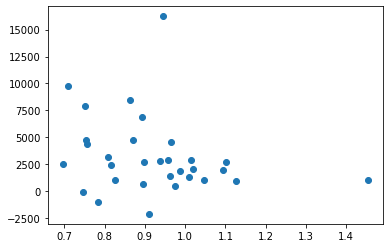

In [ ]:
print(dfwithnamefinancequalitywowlookmynamingconventionsarethebest['Quality'].corr(dfwithnamefinancequalitywowlookmynamingconventionsarethebest['Finance']))
plt.scatter(dfwithnamefinancequalitywowlookmynamingconventionsarethebest['Quality'], dfwithnamefinancequalitywowlookmynamingconventionsarethebest['Finance'])
plt.show()

final thingy

In [121]:
fd18 = pd.read_excel(r"C:\Users\thewa\Downloads\hadr-18.xlsx")
ptgr2018 = fd18.loc[(fd18["DAY_PER"] == 365) & (fd18["TYPE_HOSP"] != "Kaiser") & (fd18["ALOS_ALL"] != 0)].reset_index(drop = True)

df = pd.read_excel(r"C:\Users\thewa\OneDrive\Documents\data.xlsx") #pd.read_csv(r"C:\Users\thewa\Downloads\data.csv", encoding='cp1252')
filteredDf1 = df[df["YEAR"] == 2019]
filteredDf2 = df[df["YEAR"] == 2018]

filteredDf1 = filteredDf1.dropna()
filteredDf2 = filteredDf2.dropna()

hospitalList1 = {}
hospitalList2 = {}

stateavg1 = filteredDf1[filteredDf1["HOSPITAL"] == "STATEWIDE"]
stateavg2 = filteredDf2[filteredDf2["HOSPITAL"] == "STATEWIDE"]

stateavgdict1 = {}
for index, row in stateavg1.iterrows():
    stateavgdict1[row["Procedure/Condition"]] = float(row["Risk Adjuested Mortality Rate"])

stateavgdict2 = {}
for index, row in stateavg2.iterrows():
    stateavgdict2[row["Procedure/Condition"]] = float(row["Risk Adjuested Mortality Rate"])

conditionlist = []
weightlist = []
currentHos = ""

commonnumber = list(set(ptgr2018["FAC_NO"].tolist()) & set(filteredDf1["OSHPDID"].tolist()) & set(filteredDf2["OSHPDID"].tolist()))

ptgr2018 = ptgr2018.loc[ptgr2018["FAC_NO"].isin(commonnumber)]
filteredDf1 = filteredDf1.loc[filteredDf1["OSHPDID"].isin(commonnumber)]
filteredDf2 = filteredDf2.loc[filteredDf2["OSHPDID"].isin(commonnumber)]

parta = []
partb = []

for val in commonnumber:
    aappend = []
    
    ptgr2018hos = ptgr2018.loc[ptgr2018["FAC_NO"] == val][["MED_STAFF", "CUR_ASST", "EXP_RES", "EXP_ED"]]
    aappend.append(ptgr2018hos.iloc[0,0])
    aappend.append(ptgr2018hos.iloc[0,1])
    aappend.append(ptgr2018hos.iloc[0,2])
    aappend.append(ptgr2018hos.iloc[0,3])
    
    # 2019
    a = []
    b = []
    for index, row in filteredDf1[filteredDf1["OSHPDID"] == val].iterrows():
        a.append([row[4], row[5]])
        if row[6] == ".":
            b.append(0)
        else:
            b.append(row[6])
    
    c = 0
    for val1 in range(len(a)):
        if sum(b) != 0:
            c += a[val1][1]/stateavgdict1[a[val1][0]] * b[val1]/sum(b)
        else:
            c = 0
            break
    aappend.append(c)
    aappend.append(1)
    parta.append(aappend)
    # 2018
    a = []
    b = []
    for index, row in filteredDf2[filteredDf2["OSHPDID"] == val].iterrows():
        a.append([row[4], row[5]])
        if row[6] == ".":
            b.append(0)
        else:
            b.append(row[6])

    c = 0
    for val2 in range(len(a)):
        if sum(b) != 0:
            c += a[val2][1]/stateavgdict2[a[val2][0]] * b[val2]/sum(b)
        else:
            c = 0
            break
    partb.append(c)

In [122]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(parta, partb)
coefficients = list(reg.coef_)
coefficients

[-0.0006892694043494389,
 7.652521997675043e-11,
 1.3032010330897337e-09,
 9.39012832300593e-10,
 0.060830871963868875,
 0.0]

-1.1583700665071133


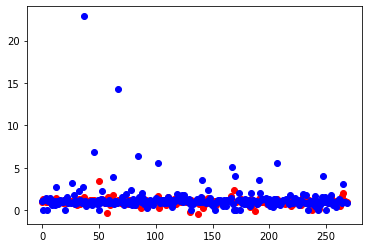

In [123]:

from sklearn.metrics import mean_squared_error
predval = []
for val in parta:
    predval.append(val[0]*coefficients[0]+val[1]*coefficients[1]+val[2]*coefficients[2]+val[3]*coefficients[3]+val[4]*coefficients[4])
import statistics
print(statistics.median(predval)-statistics.median(partb))

predval = list(np.array(predval) - (statistics.median(predval)-statistics.median(partb)))
dummyx = []
for val in range(len(partb)):
    dummyx.append(val)
plt.scatter(dummyx, predval, color = "red")
plt.scatter(dummyx, partb, color = "blue")
plt.show()

partbcopy = partb.copy()

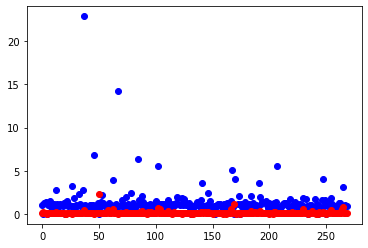

In [124]:
newpred = []
for val in range(1000):
    for val in range(len(partb)):
        newpred.append(partb[val]*coefficients[0]+parta[val][1]*coefficients[1]+parta[val][2]*coefficients[2]+parta[val][3]*coefficients[3]+parta[val][4]*coefficients[4])
    partb = newpred
    newpred = []
plt.scatter(dummyx, partbcopy, color = "blue")
plt.scatter(dummyx, partb, color = "red")
plt.show()

In [ ]:
globalmin = min(min(partb), min(predval))
globalmax = max(max(partb), max(predval))

for val in range(len(partb)):
    predval[val] = (predval[val] - globalmin)/(globalmax-globalmin)
    partb[val] = (partb[val] - globalmin)/(globalmax-globalmin)

mean_squared_error(partb, predval, squared=False)